<a href="https://colab.research.google.com/github/nirvana66649/data_visualization_covid19/blob/main/Covid_19_EDA_and_Visualization_(2020_2021).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages


In [4]:
! pip install wget
! pip install pygal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.6 MB/s eta 0:00:00


In [5]:
# Import the necessary modules
import os
import wget
import pandas as pd
import numpy as np
import json

# Visualization libraries
import matplotlib.pyplot as plt
import pygal
from pygal import Config
from pygal.style import DefaultStyle
import cufflinks as cf
#seaborn: statistical visualization
import seaborn as sns
sns.set_style("whitegrid")

# Map visualization
# folium: choropleth visualization
import folium
# altair: declarative statistical visualization
import altair as alt

# Plotly for interactive visualization
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)   # require to use plotly offline in jupyter notebook
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = "plotly_white"

import plotly.io as pio
from IPython.display import Image      # to produce plotly staic image on Github

#pip install svglib
# Configuration for high resolution for rendered images on notebook
%config InlineBackend.figure_format='retina'

from IPython.display import SVG, display
'''Display markdown formatted output like bold, italic bold, ...'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# Load Data

Download COVID-19 data from John Hopkins University on Github.

In [6]:
# Remove on the downloaded csv files
! del *.csv

# Link urls to the updated data from John Hopkins University
urls = [
    # global confirmed cases
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    # global death cases
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv']
    # global recovery cases

for url in urls:
    file = wget.download(url)

/bin/bash: line 1: del: command not found


In [7]:
# Double check if the data are in the folder
! dir *.csv

covid19_clean_data.csv
merged_uncleaned_data.csv
time_series_covid19_confirmed_global\ (1).csv
time_series_covid19_confirmed_global.csv
time_series_covid19_deaths_global\ (1).csv
time_series_covid19_deaths_global.csv


In [8]:
# Read the Global Confirmed Cases Dataset
cases = pd.read_csv('time_series_covid19_confirmed_global.csv')
cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [9]:
# Read the Death Dataset
deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


____________________________________________________________________________

# A bird-view at the data


In [10]:
# Checking the data size
# confirmed cases
print("****GLOBAL CONFIRMED CASES*****")
print("# rows: {}".format(cases.shape[0]))
print("# columns: {}".format(cases.shape[1]))
print("****GLOBAL DEATHS*****")
print("# rows: {}".format(deaths.shape[0]))
print("# columns: {}".format(deaths.shape[1]))

****GLOBAL CONFIRMED CASES*****
# rows: 289
# columns: 1147
****GLOBAL DEATHS*****
# rows: 289
# columns: 1147


In [11]:
# checking columns name
print("****All Columns Global Confirmed Cases****:\n", cases.columns)
print("\n")
print("****All Columns Gobal Deaths****:\n", deaths.columns)

****All Columns Global Confirmed Cases****:
 Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)


****All Columns Gobal Deaths****:
 Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)


In [12]:
# checking data types
print("Global Confirmed Cases Types:\n", cases.dtypes)
print("\nGlobal Deaths Types:\n", deaths.dtypes)

Global Confirmed Cases Types:
 Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/5/23              int64
3/6/23              int64
3/7/23              int64
3/8/23              int64
3/9/23              int64
Length: 1147, dtype: object

Global Deaths Types:
 Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/5/23              int64
3/6/23              int64
3/7/23              int64
3/8/23              int64
3/9/23              int64
Length: 1147, dtype: object


In [13]:
# Statistical checking for Global Confirmed Cases
cases.describe(include='all')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,91,289,287.000000,287.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
unique,91,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Australian Capital Territory,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,19.718719,22.182084,1.927336,2.273356,3.266436,4.972318,7.335640,10.134948,...,2.336755e+06,2.337519e+06,2.338173e+06,2.338805e+06,2.338992e+06,2.339187e+06,2.339387e+06,2.339839e+06,2.340460e+06,2.341073e+06
std,NaN,NaN,25.956609,77.870931,26.173664,26.270191,32.707271,45.523871,63.623197,85.724481,...,8.506608e+06,8.511285e+06,8.514488e+06,8.518031e+06,8.518408e+06,8.518645e+06,8.519346e+06,8.521641e+06,8.524968e+06,8.527765e+06
min,NaN,NaN,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,4.072192,-32.823050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04
50%,NaN,NaN,21.512583,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05
75%,NaN,NaN,40.401784,89.224350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.051998e+06,1.052122e+06,1.052247e+06,1.052382e+06,1.052519e+06,1.052664e+06,1.052664e+06,1.052926e+06,1.053068e+06,1.053213e+06


In [14]:
# Statistical checking for Global Deaths
deaths.describe(include='all')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,91,289,287.000000,287.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
unique,91,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Australian Capital Territory,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,19.718719,22.182084,0.058824,0.062284,0.089965,0.145329,0.193772,0.283737,...,2.378091e+04,2.378707e+04,2.379249e+04,2.379697e+04,2.379793e+04,2.379844e+04,2.379971e+04,2.380290e+04,2.380790e+04,2.381246e+04
std,NaN,NaN,25.956609,77.870931,1.000000,1.001525,1.413797,2.353998,3.060245,4.471644,...,9.337339e+04,9.341836e+04,9.345110e+04,9.347703e+04,9.347884e+04,9.347810e+04,9.348106e+04,9.349767e+04,9.352985e+04,9.355567e+04
min,NaN,NaN,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,4.072192,-32.823050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01
50%,NaN,NaN,21.512583,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.440000e+02,9.440000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02
75%,NaN,NaN,40.401784,89.224350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.727000e+03,8.727000e+03


In [15]:
# Checking Missing Value
print("GLOBAL CONFIRMED CASES")
cases.info()
print(cases.isnull().sum().sort_values(ascending=False))
print("\n GLOBAL DEATH CASES")
deaths.info()
print(deaths.isnull().sum().sort_values(ascending=False))

GLOBAL CONFIRMED CASES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB
Province/State    198
Lat                 2
Long                2
2/25/22             0
2/24/22             0
                 ... 
2/2/21              0
2/1/21              0
1/31/21             0
1/30/21             0
2/7/21              0
Length: 1147, dtype: int64

 GLOBAL DEATH CASES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB
Province/State    198
Lat                 2
Long                2
2/25/22             0
2/24/22             0
                 ... 
2/2/21              0
2/1/21              0
1/31/21             0
1/30/21             0
2/7/21              0
Length: 1147, dtype: int64


In [16]:
# Combine Confirmed & Death Cases

# Extract date data
date = cases.columns[4:]
# unpivot Global Confirmed Cases dataset
cases_df = cases.melt(id_vars=['Province/State','Country/Region','Lat','Long'],
                      value_vars = date, var_name = 'Date', value_name = 'Confirmed Cases')

# unpivot Gloal Deaths dataset
deaths_df = deaths.melt(id_vars=['Province/State', 'Country/Region','Lat','Long'],
                        value_vars = date, var_name = 'Date', value_name = 'Deaths')
# merged two new data frame
df = pd.concat([cases_df, deaths_df['Deaths']], axis = 1, sort = False)
# Check the data
df.tail()
#df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,703228,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,535,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,11945,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,343135,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,264276,5671


In [17]:
# Save the data
df.to_csv('merged_uncleaned_data.csv')

In [18]:
print("There are {} unique values for columns 'Province/State'".format(len(df['Province/State'].unique())))
df['Province/State'].unique()

There are 92 unique values for columns 'Province/State'


array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Repatriated Travellers', 'Saskatchewan', 'Yukon',
       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Unknown', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Faroe Islands', 'Greenland', 'French Guiana', 'French Polynesia',
       'Guadeloupe', 'Martiniq

In [19]:
# Correct the values in 'Province/State'
# Remove the ',' in Bonaire, Sint Eustatius and Saba to avoid redundancy
df = df[df['Province/State'].str.contains(',')!=True]
#recovery_df = recovery_df[recovery_df['Province/State'].str.contains(',')!=True]
# Check the number of column again
len(df['Province/State'].unique())

90

In [20]:
#Checking current country names in the dataframe
#df['Country/Region'].unique()

In [21]:
# Changing the country name for using the package 'pycountry_convert'
# !pip install pycountry-convert
# Dictionary of new country name
country_dict = {'Taiwan*': 'Taiwan',
          'US': 'USA',
          'Korea, South':'South Korea',
          'Reunion':'Réunion',
          'Congo (Kinshasa)': 'Democratic Republic of the Congo',
          'Congo (Brazzaville)': 'Republic of the Congo',
          "Cote d'Ivoire": "Côte d'Ivoire",
           'Bahamas, The': 'Bahamas',
           'Gambia, The': 'Gambia'
    }

# Change the old country names with the new country names
for o,n in country_dict.items():
    df['Country/Region']=df['Country/Region'].replace(o,n)

In [22]:
#print(df['Country/Region'].unique())
#print(len(df['Country/Region'].unique()))
# Checking the result
df[df['Country/Region']=='Taiwan'].head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
249,NaN,Taiwan,23.7,121.0,1/22/20,1,0
538,NaN,Taiwan,23.7,121.0,1/23/20,1,0
827,NaN,Taiwan,23.7,121.0,1/24/20,3,0
1116,NaN,Taiwan,23.7,121.0,1/25/20,3,0
1405,NaN,Taiwan,23.7,121.0,1/26/20,4,0


In [23]:
# Checking the data of Hubei on 2/12/2020
df[(df['Province/State']=='Hubei')&(df['Date']=='2/12/20')]

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
6141,Hubei,China,30.9756,112.2707,2/12/20,33366,1068


In [24]:
# Create a function to correct the value
def correcting_value(region, date, value_name, correct_value):
    for key, val in correct_value.items():
        df.loc[(df[region]==key)&(df['Date']==date), value_name]=val

# Correct Data is 34874 cases
hubei21220 = {'Hubei':34874}

# Correct the data
correcting_value('Province/State','2/12/20','Confirmed Cases', hubei21220)

In [25]:
# Checking the result
df[(df['Province/State']=='Hubei')&(df['Date']=='2/12/20')]

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
6141,Hubei,China,30.9756,112.2707,2/12/20,34874,1068


In [26]:
# Checking the data of Vietnam on 2/12/2020
df[(df['Country/Region']=='Vietnam')&(df['Date']=='8/18/20')]

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
60684,NaN,Vietnam,14.058324,108.277199,8/18/20,989,26


In [27]:
# Create a function to correct the value
def correcting_value(region, date, value_name, correct_value):
    for key, val in correct_value.items():
        df.loc[(df[region]==key)&(df['Date']==date), value_name]=val

# Correct Data is 26 deaths
vietnam8182020 = {'Vietnam':25}

# Correct the data
correcting_value('Country/Region','8/18/20','Deaths', vietnam8182020)

In [28]:
# Checking the result
df[(df['Country/Region']=='Vietnam')&(df['Date']=='8/18/20')]

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
60684,NaN,Vietnam,14.058324,108.277199,8/18/20,989,25


In [29]:
# Convert date from string to datetime type using pd.to_datetime
# Use strftime to sort the date order again (month, date, year)
df['Date']=pd.to_datetime(df['Date']).dt.strftime('%m/%d/%Y')
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
330322,NaN,West Bank and Gaza,31.952200,35.233200,03/09/2023,703228,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,03/09/2023,535,0
330324,NaN,Yemen,15.552727,48.516388,03/09/2023,11945,2159
330325,NaN,Zambia,-13.133897,27.849332,03/09/2023,343135,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,03/09/2023,264276,5671


In [30]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
330322,NaN,West Bank and Gaza,31.952200,35.233200,03/09/2023,703228,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,03/09/2023,535,0
330324,NaN,Yemen,15.552727,48.516388,03/09/2023,11945,2159
330325,NaN,Zambia,-13.133897,27.849332,03/09/2023,343135,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,03/09/2023,264276,5671



### **Save data for further analysis**

In [31]:
df.to_csv('covid19_clean_data.csv')

_______________ ____________
# Exploratory Data Analysis


In [32]:
# Show the statiscal overview of the data
df.describe(include="all")

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
count,101727,328041,325755.000000,325755.000000,328041,3.280410e+05,3.280410e+05
unique,89,201,NaN,NaN,1143,NaN,NaN
top,Australian Capital Territory,China,NaN,NaN,03/09/2023,NaN,NaN
freq,1143,38862,NaN,NaN,287,NaN,NaN
mean,NaN,NaN,19.842248,22.627552,NaN,9.660530e+05,1.347330e+04
std,NaN,NaN,25.946316,77.792077,NaN,4.882301e+06,6.410434e+04
min,NaN,NaN,-71.949900,-178.116500,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,4.210484,-23.041800,NaN,7.100000e+02,3.000000e+00
50%,NaN,NaN,21.521757,21.005900,NaN,1.486200e+04,1.550000e+02
75%,NaN,NaN,40.463667,90.356300,NaN,2.312990e+05,3.064000e+03


In [33]:
print("There are now {} variables and {} records in this dataset".format(df.shape[1],df.shape[0]))

There are now 7 variables and 328041 records in this dataset



# 1. GLOBAL LEVEL

### What are the lastest confirmed cases and deaths in the world?

In [34]:
# Extract the final date of the dataframe
final_date = df.Date.iloc[-1]
# Extract the cases on the final_date
most_recent_df =df[df.Date == final_date]
# Most updated on Global COVID-19 confirmed cases and deaths
print("Globally COVID-19 information on {}:\n\
      \nConfirmed Cases: {:,}\nDeaths: {:,}".format(final_date,
                             most_recent_df["Confirmed Cases"].sum(),   # Lastest info about confirmed cases
                             most_recent_df["Deaths"].sum()))           # Lastest info about deaths


Globally COVID-19 information on 03/09/2023:
      
Confirmed Cases: 676,556,179
Deaths: 6,881,761


### An overview of COVID-19 fatality and recovery rate at Global level

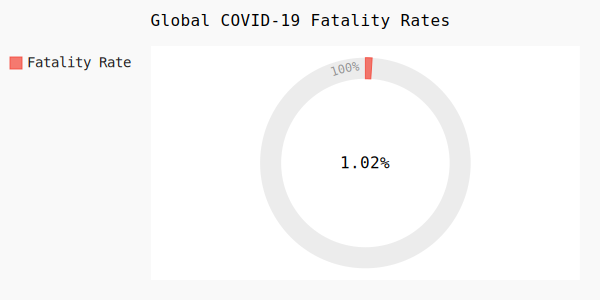

In [35]:
# Calculate global fatality rate
fatality_rate = round((most_recent_df["Deaths"].sum()/ most_recent_df["Confirmed Cases"].sum())*100,2)

# Plot global fatality rate in a gauge chart
gauge = pygal.SolidGauge(inner_radius=0.80, width=600,height=300) # Gauge chart configuration
percent_formatter = lambda x: '{:.10g}%'.format(x)             # format fatality rate in %
gauge.value_formatter = percent_formatter
gauge.title = "Global COVID-19 Fatality Rates"                # Set chart title
gauge.add('Fatality Rate',[{'value':fatality_rate}])

display(SVG(gauge.render(disable_xml_declaration=True)))


In [36]:
# Define a function to calculate fatality rate
def fatality_rate(deaths,cases):
    fatality = (deaths/cases)*100
    return round(fatality,2)

In [37]:
# Extract the data by country on the most recent date
country_data = most_recent_df.groupby('Country/Region')[['Confirmed Cases', 'Deaths']]\
              .sum()\
              .reset_index()

# Calculate fatality rate
country_data['fatality_rate'] = country_data.apply(
    lambda row: fatality_rate(row["Deaths"], row["Confirmed Cases"]), axis=1)

# Color palette for cmap is diverging orange red
color_cases = 'OrRd'
color_death = 'OrRd'

# Create a highlighting color on country cases table
cmap_country = country_data.sort_values('Confirmed Cases', ascending=False).reset_index(drop=True)\
    .style.background_gradient(cmap=color_cases, subset=['Confirmed Cases'])\
    .background_gradient(cmap=color_death, subset=['Deaths'])\
    .background_gradient(cmap=color_death, subset=['fatality_rate'])

display(cmap_country)


,Country/Region,Confirmed Cases,Deaths,fatality_rate
0,USA,103802702,1123836,1.080000
1,India,44690738,530779,1.190000
2,France,39866718,166176,0.420000
3,Germany,38249060,168935,0.440000
4,Brazil,37076053,699276,1.890000
5,Japan,33320438,72997,0.220000
6,South Korea,30615522,34093,0.110000
7,Italy,25603510,188322,0.740000
8,United Kingdom,24656539,220721,0.900000
9,Russia,22075858,388478,1.760000


In [38]:
 !pip install -U kaleido

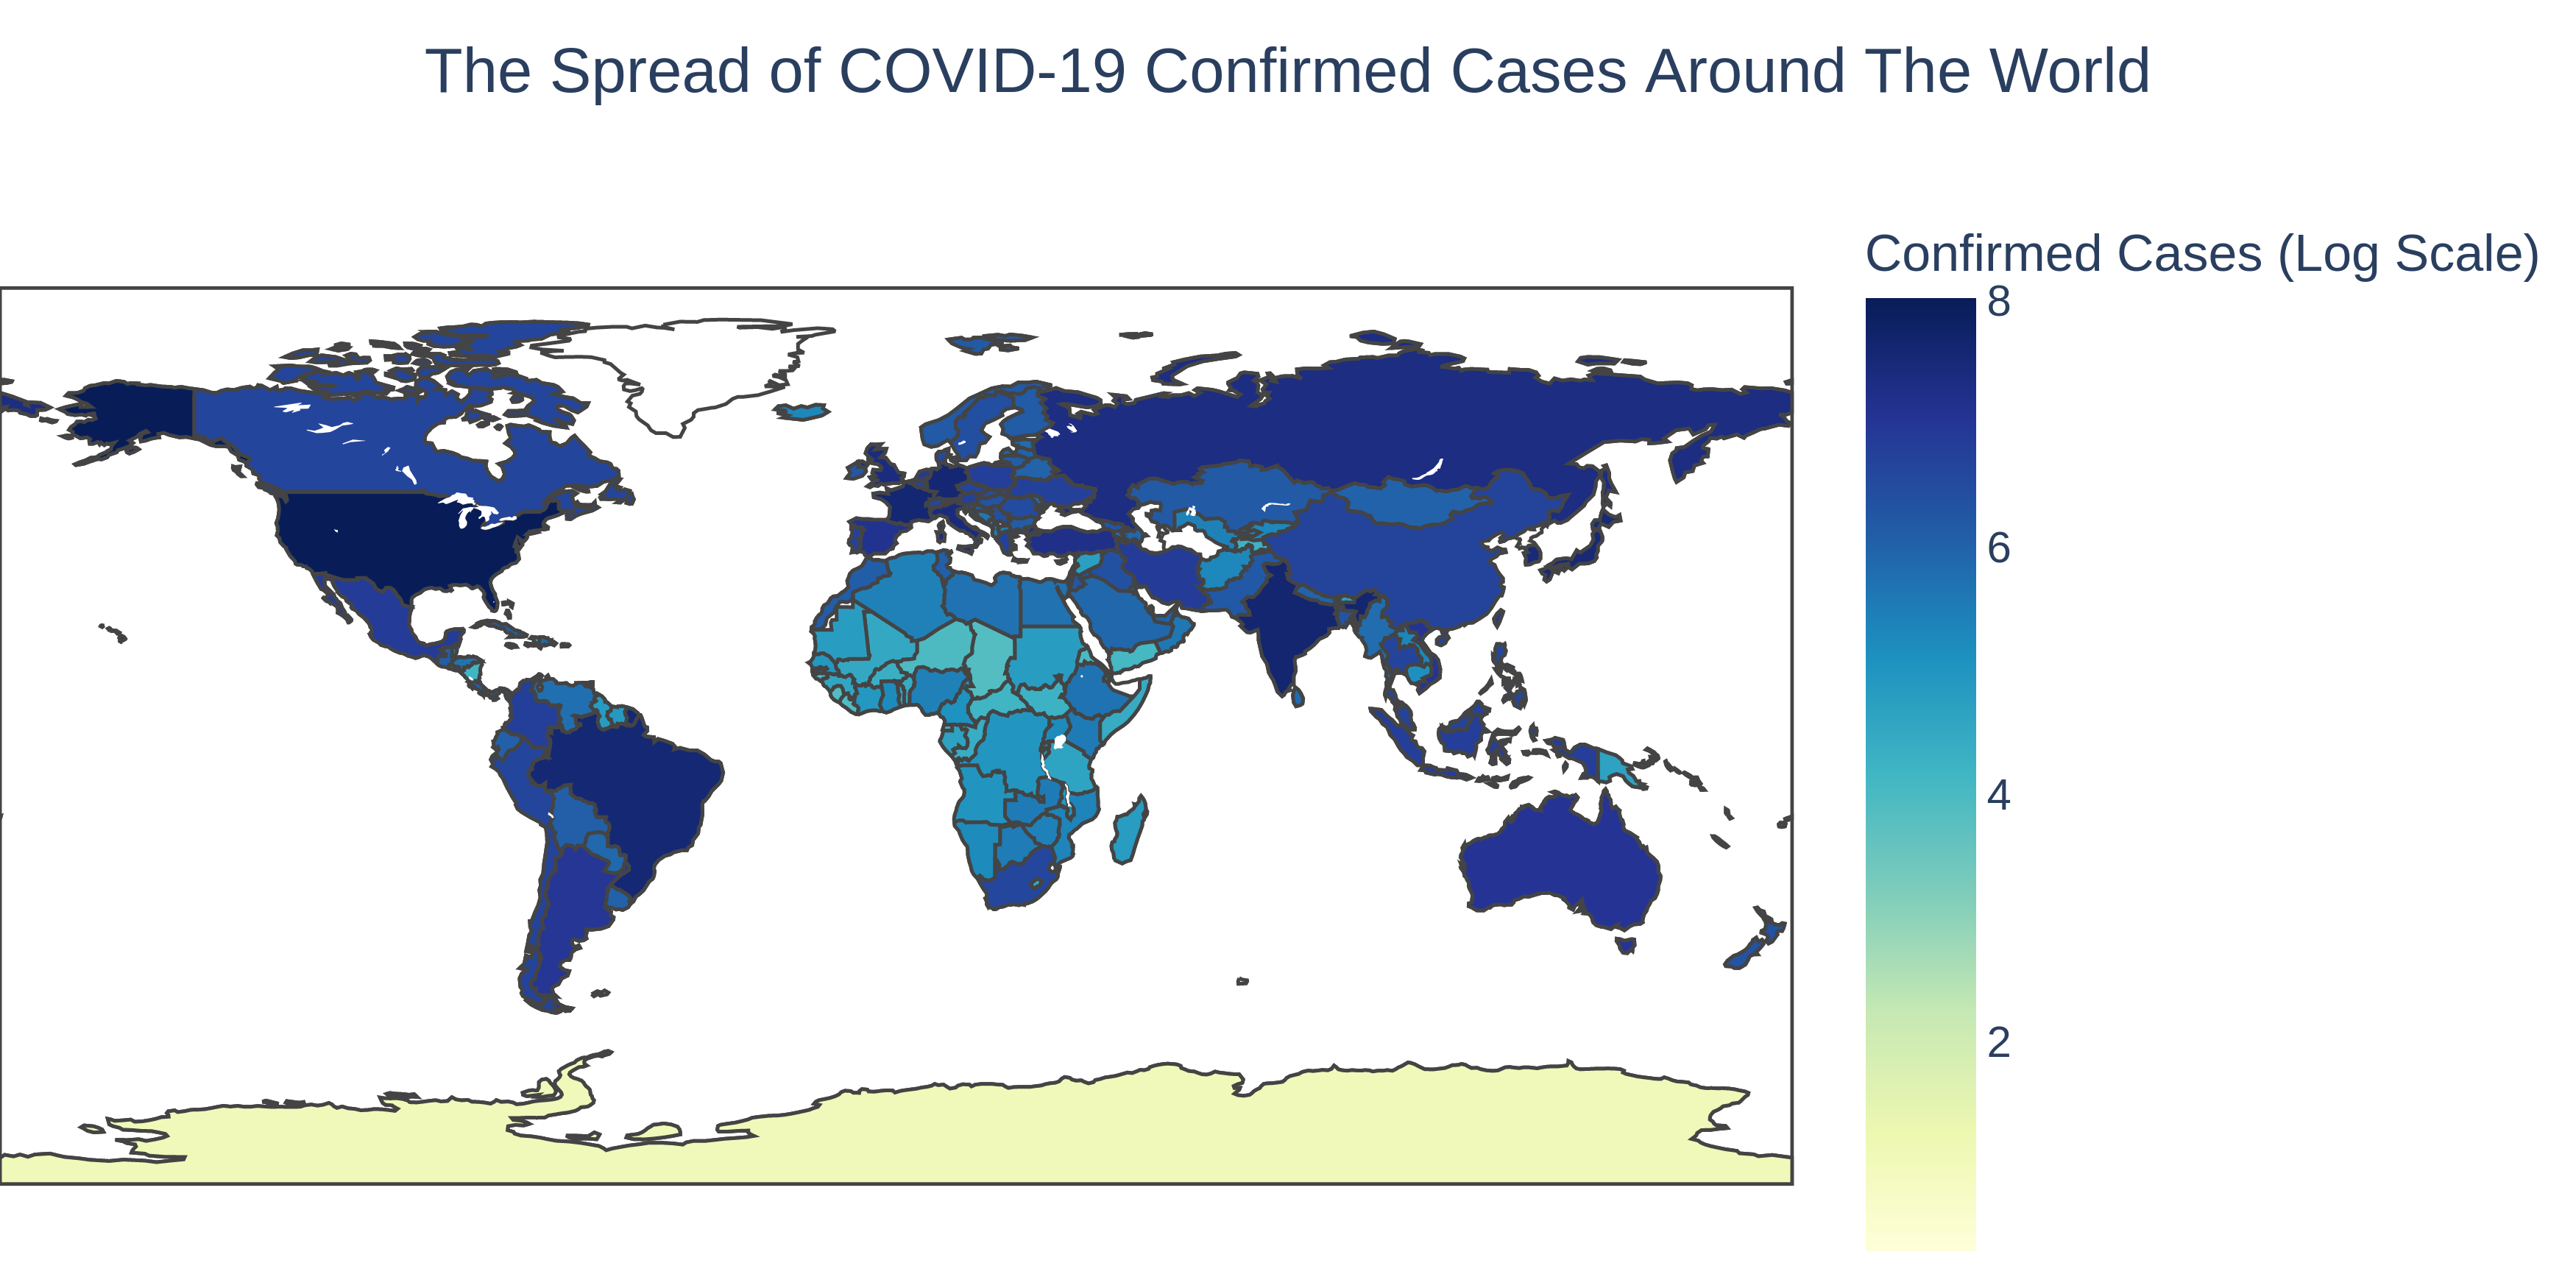

In [39]:
# Using choropleth


# list of parameters
map_value = 'Confirmed Cases'
color = "YlGnBu"

# Create a function to plot the map
def plotting_global_heatmap(country_data, map_value, color):
    temp = country_data[['Country/Region',map_value]]
    plot = px.choropleth(temp, locations='Country/Region',   # map configuration
                        color = np.log10(temp[map_value] + 1), # + 1 to avoid divided by 0, log0
                        hover_name = 'Country/Region', # set hover name
                        hover_data = [map_value],
                        color_continuous_scale = px.colors.sequential.Plasma, locationmode = "country names")
    plot.update_layout(title_text = "The Spread of COVID-19 {} Around The World".format(map_value), title_x=0.5,
                      height=350,margin={"r":30,"t":50,"l":0,"b":0})
    plot.update_coloraxes(colorbar_title="{} (Log Scale)".format(map_value),colorscale="YlGnBu")
    return plot

# Plotting global heat map
plot = plotting_global_heatmap(country_data,map_value,color)
#plot.show()
pio.write_image(plot, "Heat Map Confirmed Cases.png", format = 'png', scale=3)
Image(pio.to_image(plot, format='png', scale=5))

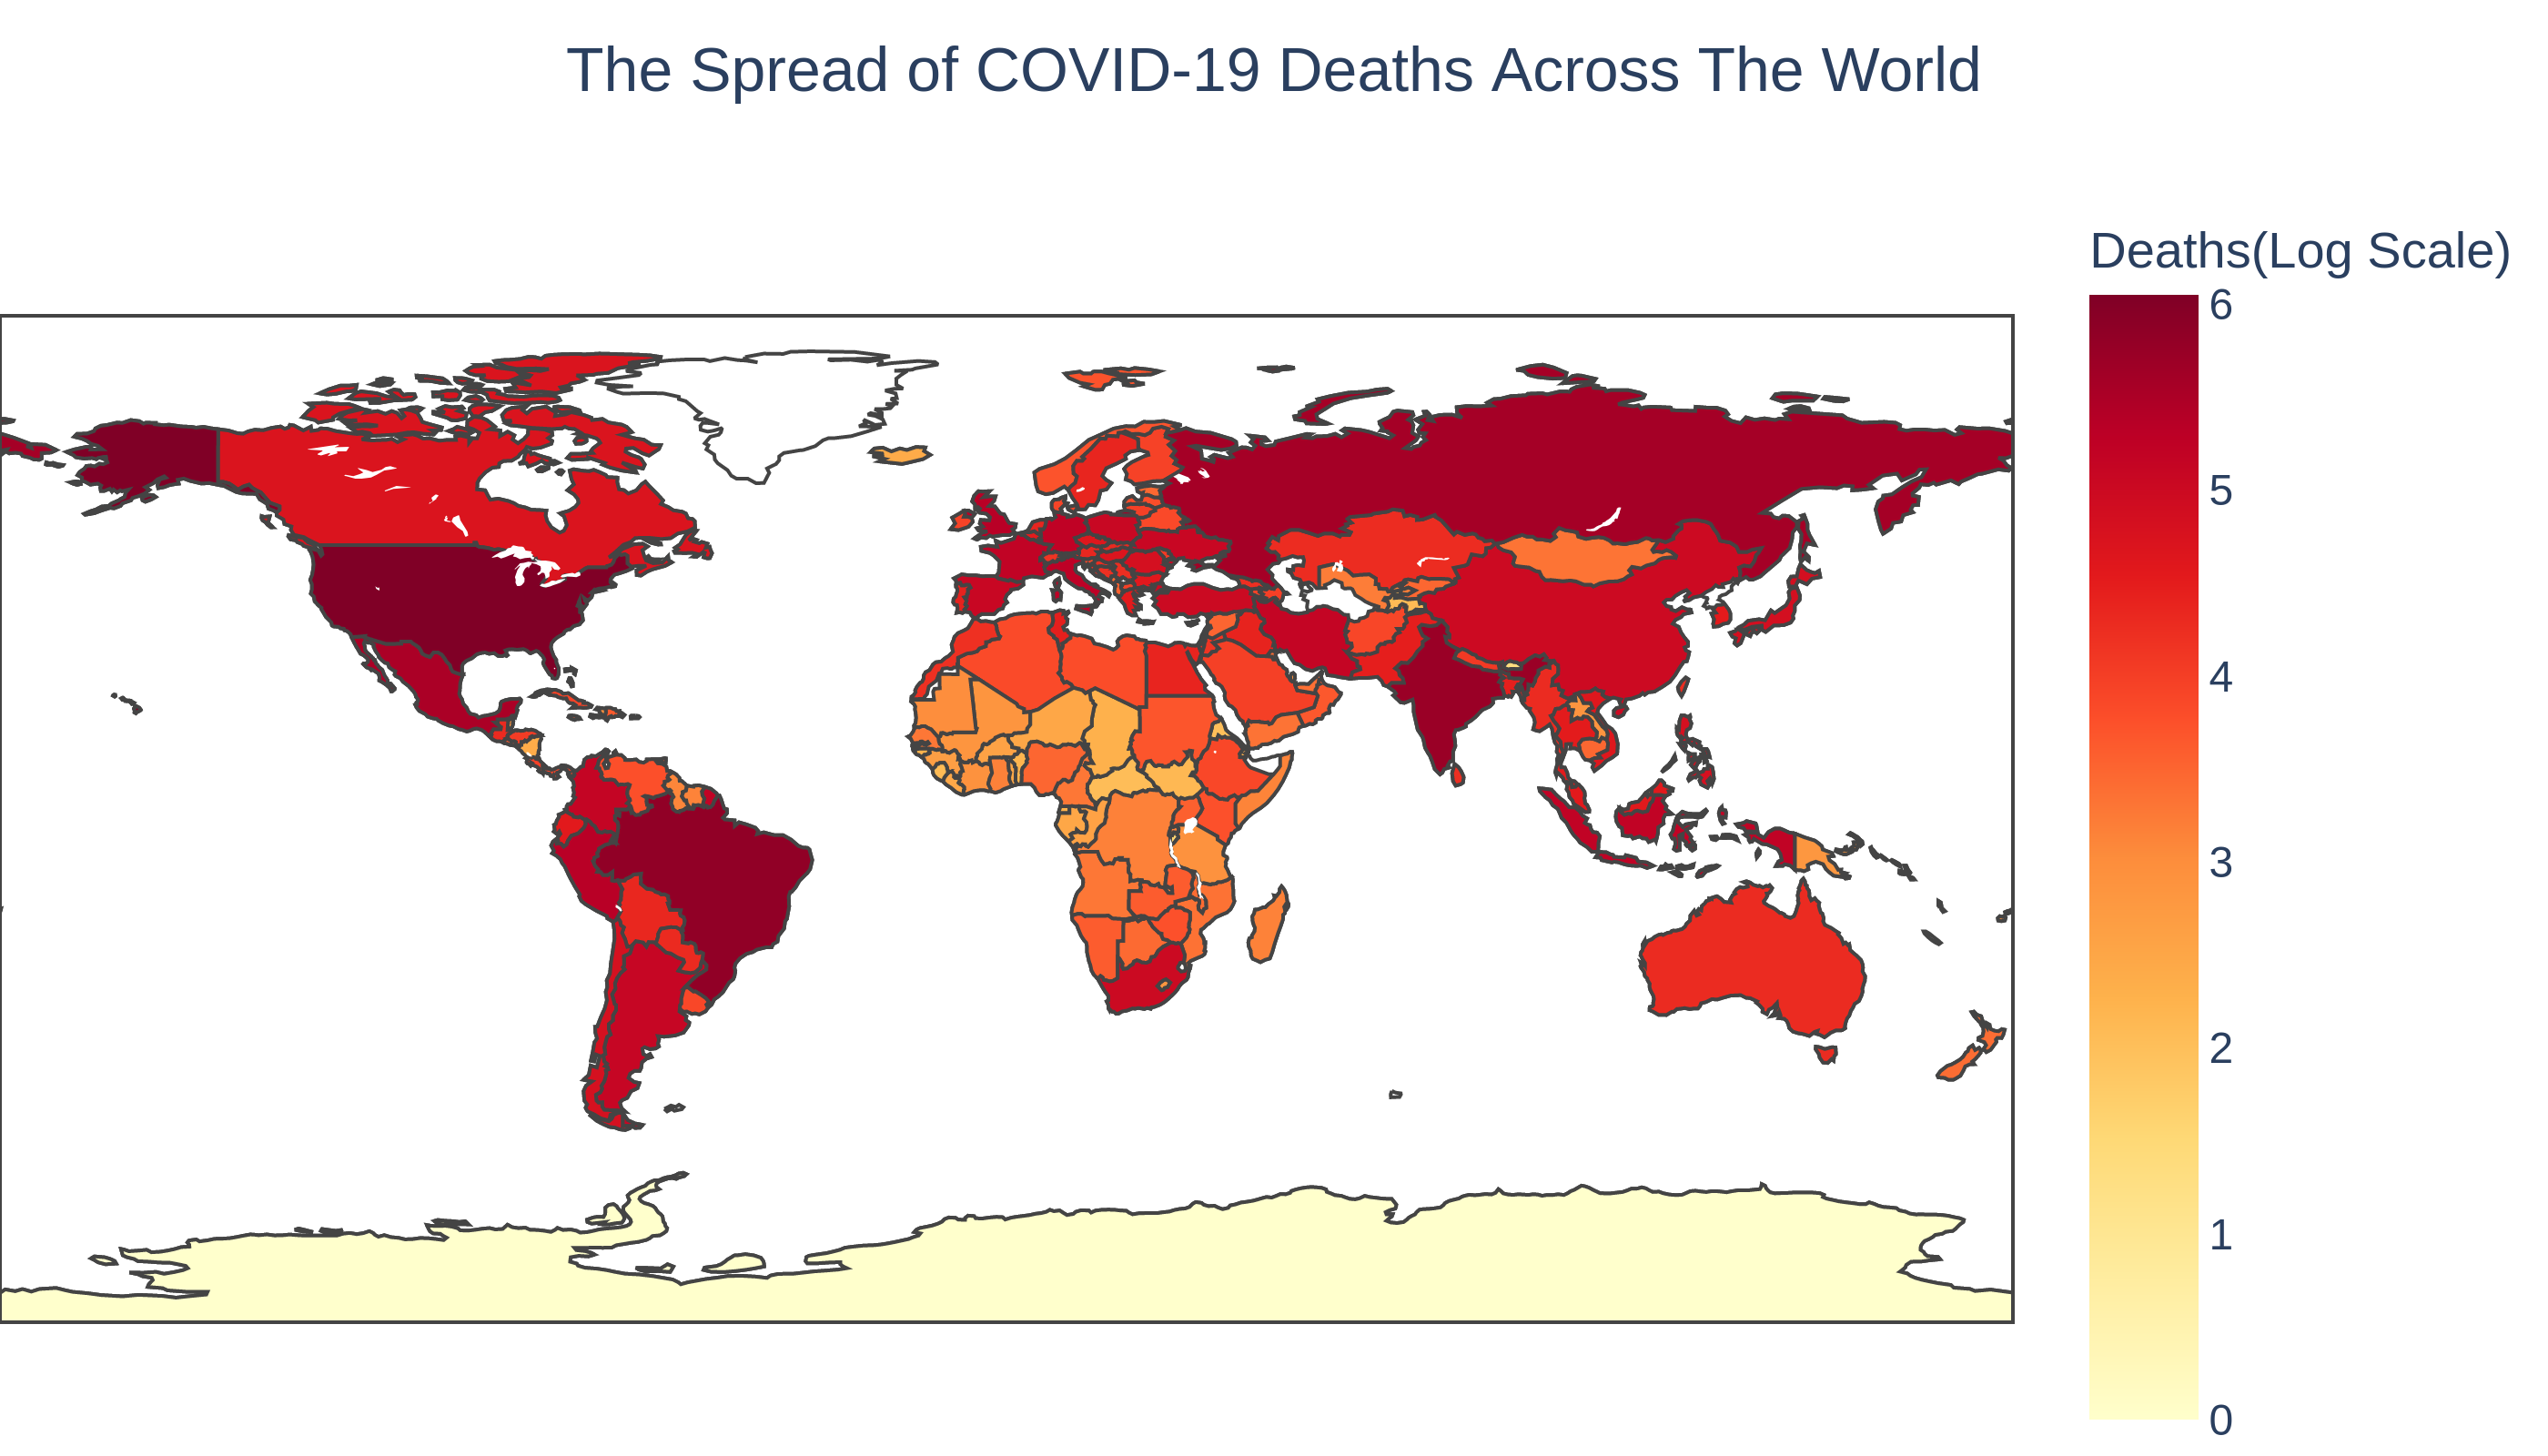

In [40]:
# Using choropleth
# Data: using country_data dataframe (log10 scale)

# list of parameters
map_value = 'Deaths'
color = "YlOrRd"

# Create a function to plot the map
def plotting_global_heatmap(country_data, map_value, color):
    temp = country_data[['Country/Region',map_value]]
    plot = px.choropleth(temp, locations='Country/Region',   # map configuration
                        color = np.log10(temp[map_value] + 1), # + 1 to avoid divided by 0, log0
                        hover_name = 'Country/Region', # set hover name
                        hover_data = [map_value],
                        color_continuous_scale = px.colors.sequential.Greys,
                         locationmode = "country names")
    plot.update_layout(title_text = "The Spread of COVID-19 {} Across The World".format(map_value),
                       title_x=0.5, height=400,margin={"r":30,"t":50,"l":0,"b":0})
    plot.update_coloraxes(colorbar_title="{}(Log Scale)".format(map_value),
                          colorscale = "YlOrRd")
    return plot

# Plotting global heat map
plot2 = plotting_global_heatmap(country_data,map_value,color)
#plot2.show()
pio.write_image(plot2, "Heat Map Deaths.png", format = 'png', scale=5, height=400)
Image(pio.to_image(plot2, format='png', scale=4))

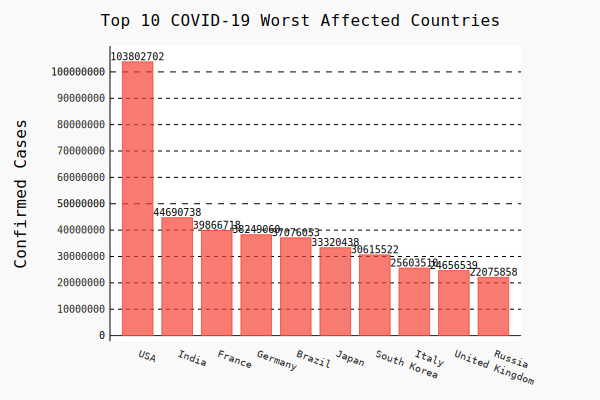

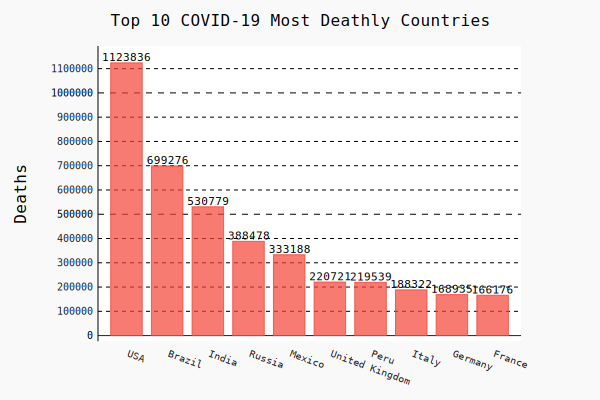

In [41]:
# TOP 10 COUNTRY BAR CHART
# Extracting top 10 countries with the highest confirmed cases
top10_country = country_data.sort_values('Confirmed Cases',ascending=False).head(10)
# Plot Top 10 Country: COVID-19 Confirmed Cases
chart_cf = pygal.Bar(show_legend = False, human_readable = True, fill = True, width = 600,
    height = 400, x_label_rotation = 20, print_values = True, print_values_position = 'top',
    style = DefaultStyle(value_font_size = 10, value_colors=('black',)))
chart_cf.y_title = "Confirmed Cases"
chart_cf.title = 'Top 10 COVID-19 Worst Affected Countries'     # set chart title
chart_cf.x_labels = [i for i in top10_country['Country/Region']]  # label of country names
chart_cf.add('Confirmed Cases', top10_country['Confirmed Cases'])
display(SVG(chart_cf.render(disable_xml_declaration=True)))

# Extracting top 10 countries with the highest deaths
top10_country_deaths = country_data.sort_values('Deaths',ascending=False).head(10)
# plot Top 10 Country: COVID-19 Deaths
from pygal.style import DarkSolarizedStyle, NeonStyle
chart_d = pygal.Bar(show_legend = False, human_readable = True, fill = True, width = 600,
    height = 400, x_label_rotation = 20, print_values = True, print_values_position = 'top',
    style = DefaultStyle(value_font_size = 11, value_colors=('black',)))
chart_d.y_title = "Deaths"
chart_d.title = 'Top 10 COVID-19 Most Deathly Countries'     # set chart title
chart_d.x_labels = [i for i in top10_country_deaths['Country/Region']]  # label of country names
chart_d.add('Confirmed Deaths', top10_country_deaths['Deaths'])
display(SVG(chart_d.render(disable_xml_declaration=True)))

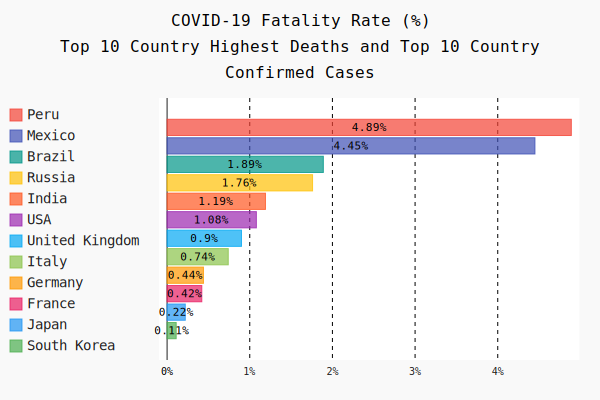

In [42]:
#### DATA PREP ###
# Calculate fatality rate for top 10 country with highest confirmed cases
top10_country['fatality_rate'] = top10_country[['Confirmed Cases','Deaths']]\
        .apply(lambda row: fatality_rate(row["Deaths"], row["Confirmed Cases"]), axis=1)

# Calculate fatality rate for top 10 country with highest deaths
top10_country_deaths['fatality_rate'] = top10_country_deaths[['Confirmed Cases','Deaths']]\
        .apply(lambda row: fatality_rate(row["Deaths"], row["Confirmed Cases"]), axis=1)

# Combine data of country with highest confirmed cases and highest deaths
df_country_top10 = pd.concat([top10_country_deaths,top10_country]).drop_duplicates().sort_values('fatality_rate',
                                                                                                ascending=False)
##### PLOT HORIZONTAL BAR CHART TO DISPLAY FATALITY RATE ####
# Plot COVID-19 Fatality Rate for Top 10 Country with Highest Confirmed Cases and Highest Deths
chart_f = pygal.HorizontalBar(print_values=True, width = 600,
    height = 400,                              # Set chart configuration
                              style = DefaultStyle(value_font_size = 11, value_colors=('black',)))
percent_formatter = lambda x: '{:.10g}%'.format(x)                             # format fatality rate in %
chart_f.value_formatter = percent_formatter
chart_f.title = "COVID-19 Fatality Rate (%)\n Top 10 Country Highest Deaths and Top 10 Country Confirmed Cases"                   # Set chart title
for country,rate in zip(df_country_top10["Country/Region"],              # Add value to chart
                        df_country_top10["fatality_rate"]):
    chart_f.add(country,rate)
display(SVG(chart_f.render(disable_xml_declaration=True)))

# 5. TOP 10 FATALITY RATE COUNTRIES IN THE WORLD

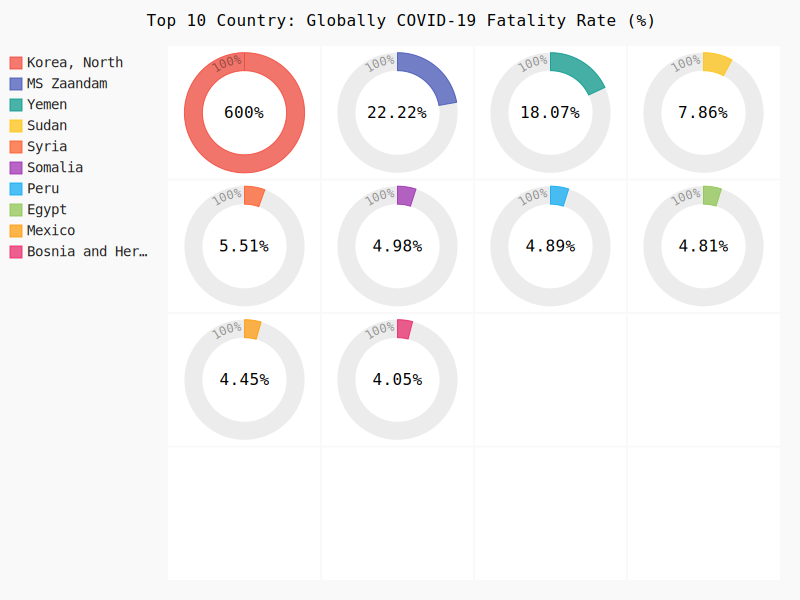

In [43]:
### Top 10 COVID-19 Fatality Rate (Globally)
top10_country_fatality = country_data.sort_values('fatality_rate',ascending=False).head(10)
### Top 10 COVID-19 Fatality Rate (Globally)
top10_country_fatality = country_data.sort_values('fatality_rate',ascending=False).head(10)

# Plot Fatality Rate for top highest country/region globally
gauge_fatality = pygal.SolidGauge(inner_radius=0.70)
percent_formatter = lambda x: '{:.10g}%'.format(x)
gauge_fatality.value_formatter = percent_formatter
gauge_fatality.title = "Top 10 Country: Globally COVID-19 Fatality Rate (%)"            # Set title
for country,rate in zip(top10_country_fatality["Country/Region"],              # Add value to chart
                        top10_country_fatality["fatality_rate"]):
    gauge_fatality.add(country,[{'value':rate}])
display(SVG(gauge_fatality.render(disable_xml_declaration=True))) # Show chart

- Yemen came in as the first place with the highest fatality rate (29%). However, the country only totaled 612 deaths and 2115 cases.

- Though MS Zaandam has the second highest fatality rate of 22% but this country has significant small confirmed cases (9) and deaths(2).  

# 7. COUNTRY COMPARISON SINCE THE EARLY STAGE OF THE PANDEMIC

In [45]:
# Sum up all cases for each country by date
countries_cases_all_time = df.groupby(['Date', 'Country/Region'])[['Confirmed Cases', 'Deaths']]\
    .sum().sort_values('Date').reset_index()


# Find top 10 countries with the highest number of confirmed cases
top10_country = country_data.sort_values('Confirmed Cases', ascending=False)\
            .head(10)['Country/Region'].unique()

print("Top 10 countries with highest confirmed cases are: \n\n{}".format(set(top10_country)))

# Extract top 10 countries cases from countries cases all time
top10_country_cases = countries_cases_all_time[countries_cases_all_time['Country/Region'].isin(top10_country)]

# Convert the date to datetime format
top10_country_cases['Date'] = pd.to_datetime(top10_country_cases['Date'])

# Calculate Log of Confirmed Cases & Deaths
top10_country_cases['Log(Confirmed Cases)'] = np.log(top10_country_cases['Confirmed Cases'])
top10_country_cases['Log(Deaths)'] = np.log(top10_country_cases['Deaths'])

top10_country_cases.head()

Top 10 countries with highest confirmed cases are: 

{'France', 'Russia', 'India', 'Italy', 'Germany', 'USA', 'Japan', 'Brazil', 'United Kingdom', 'South Korea'}


,Date,Country/Region,Confirmed Cases,Deaths,Log(Confirmed Cases),Log(Deaths)
19,2021-01-01,Russia,3153960,56798,14.964169,10.947256
57,2021-01-01,USA,20397398,352844,16.830918,12.773781
61,2021-01-01,United Kingdom,2549667,95917,14.751473,11.471239
98,2021-01-01,South Korea,62593,942,11.044409,6.848005
125,2021-01-01,Brazil,7703971,195541,15.857246,12.183525


## Top 10 Wost Affected Countries Since The Early Stage of The Pandemic

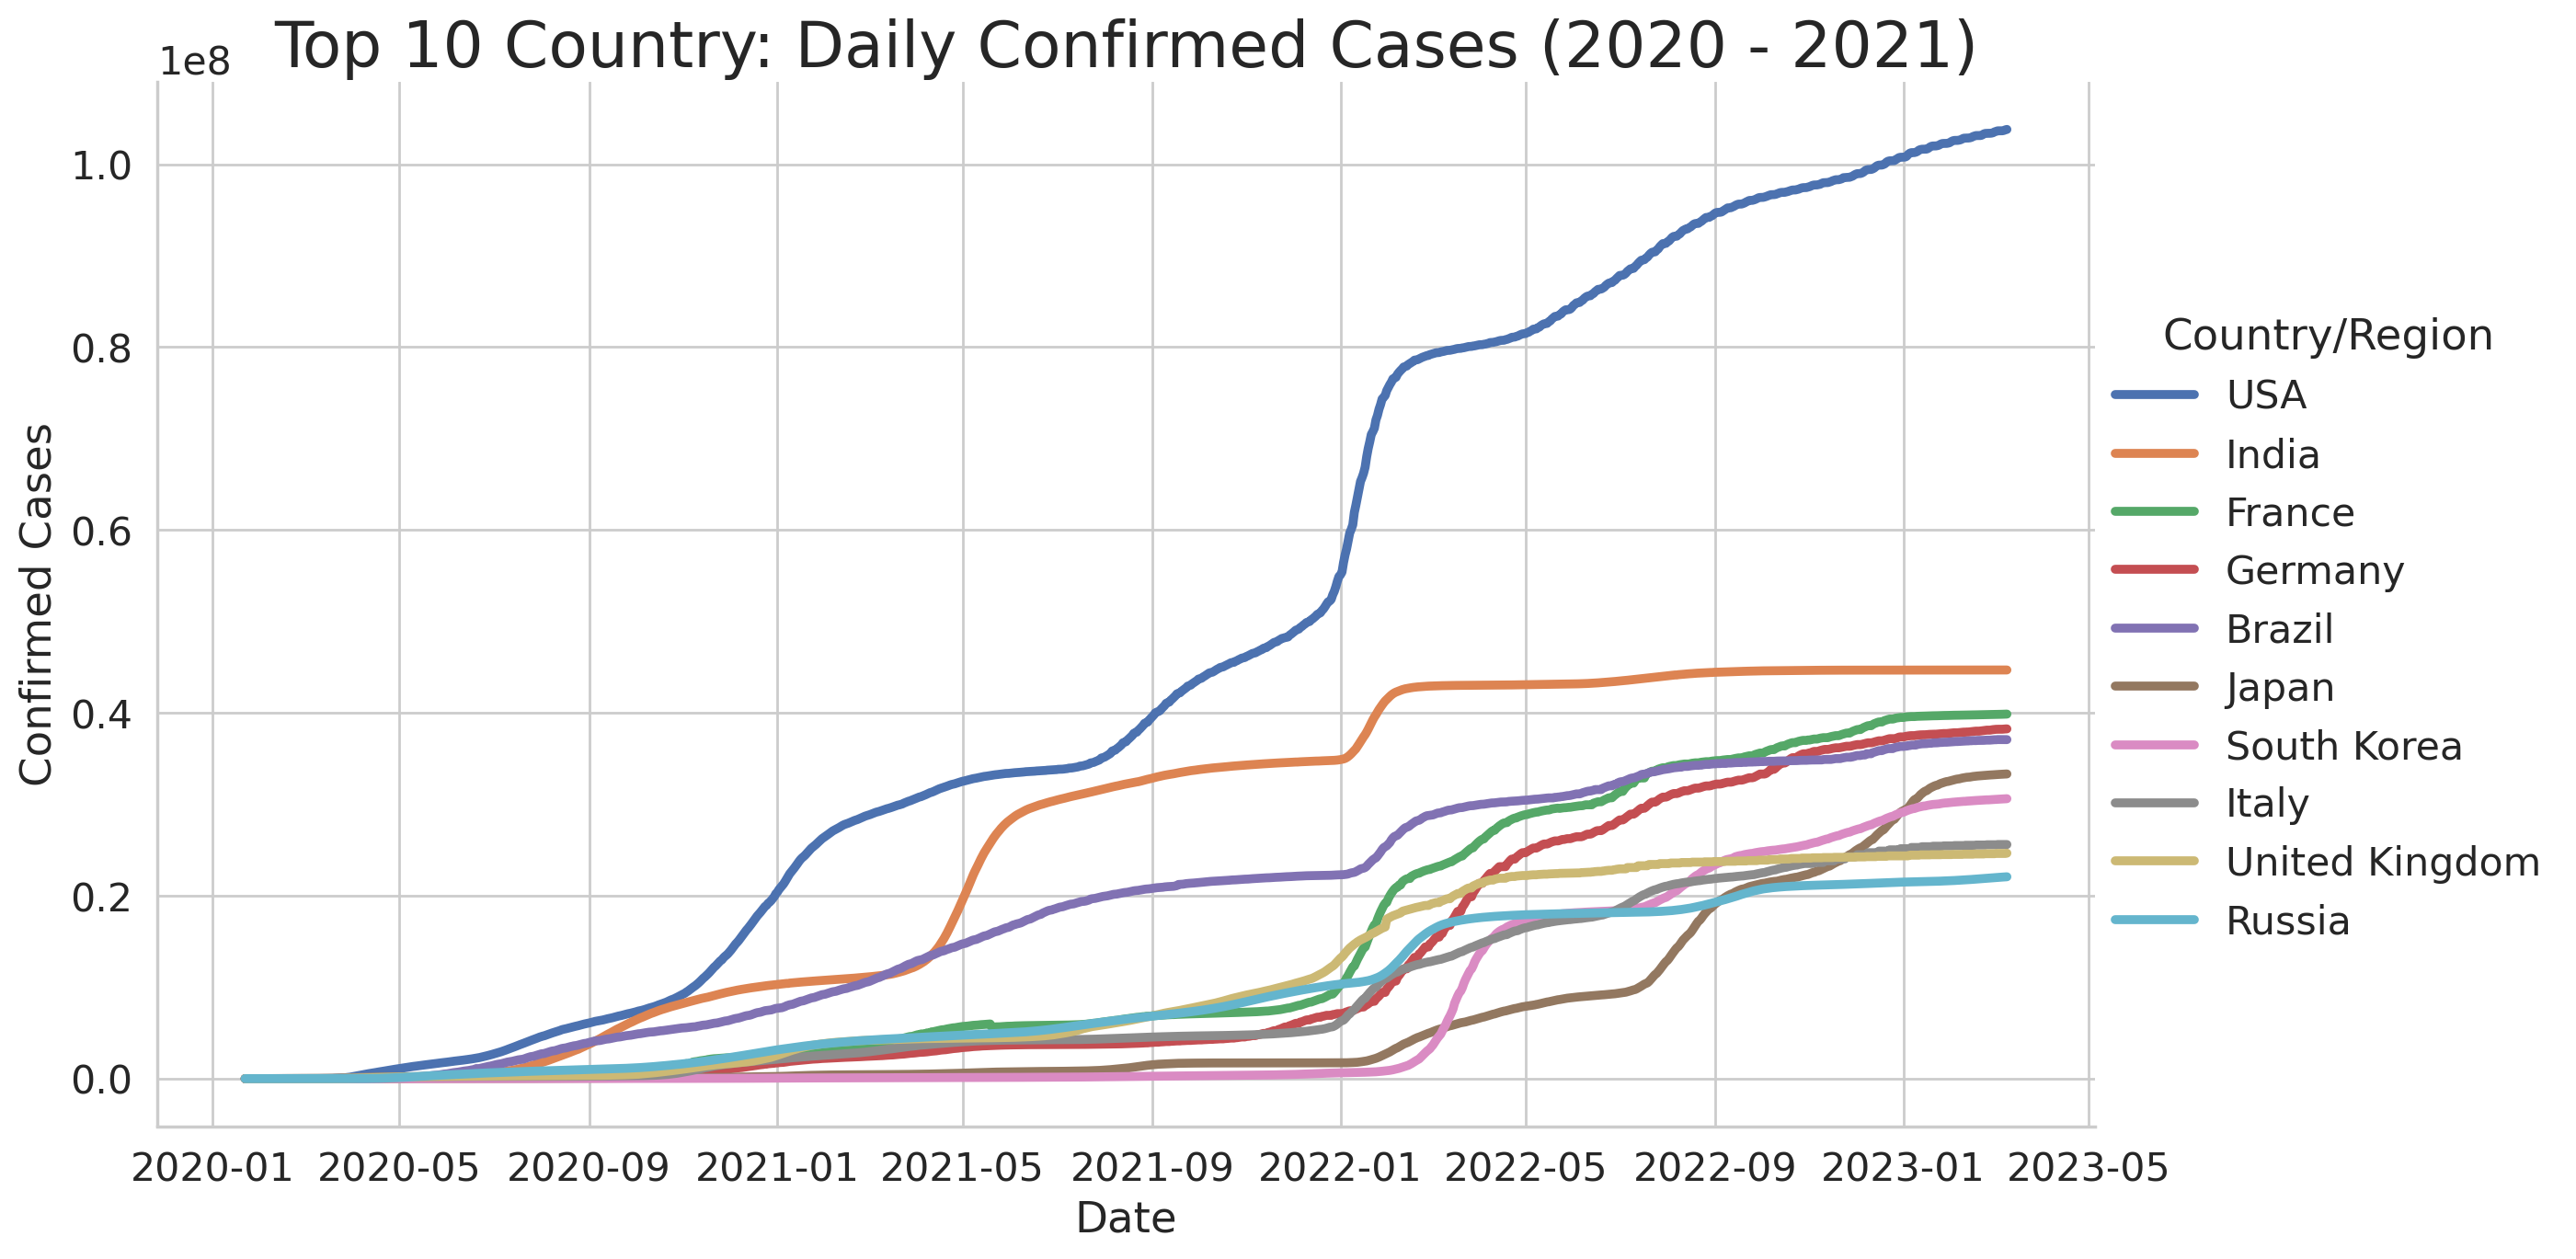

In [46]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":3.5,"axes.titlesize":25})
# Plot the confirmed cases comparison between countries
sns.relplot( data = top10_country_cases, x="Date", y="Confirmed Cases", hue="Country/Region", hue_order = top10_country,
    kind="line", height=7, aspect=1.7, facet_kws=dict(sharex=False))\
.set(title="Top 10 Country: Daily Confirmed Cases (2020 - 2021)")
plt.show();

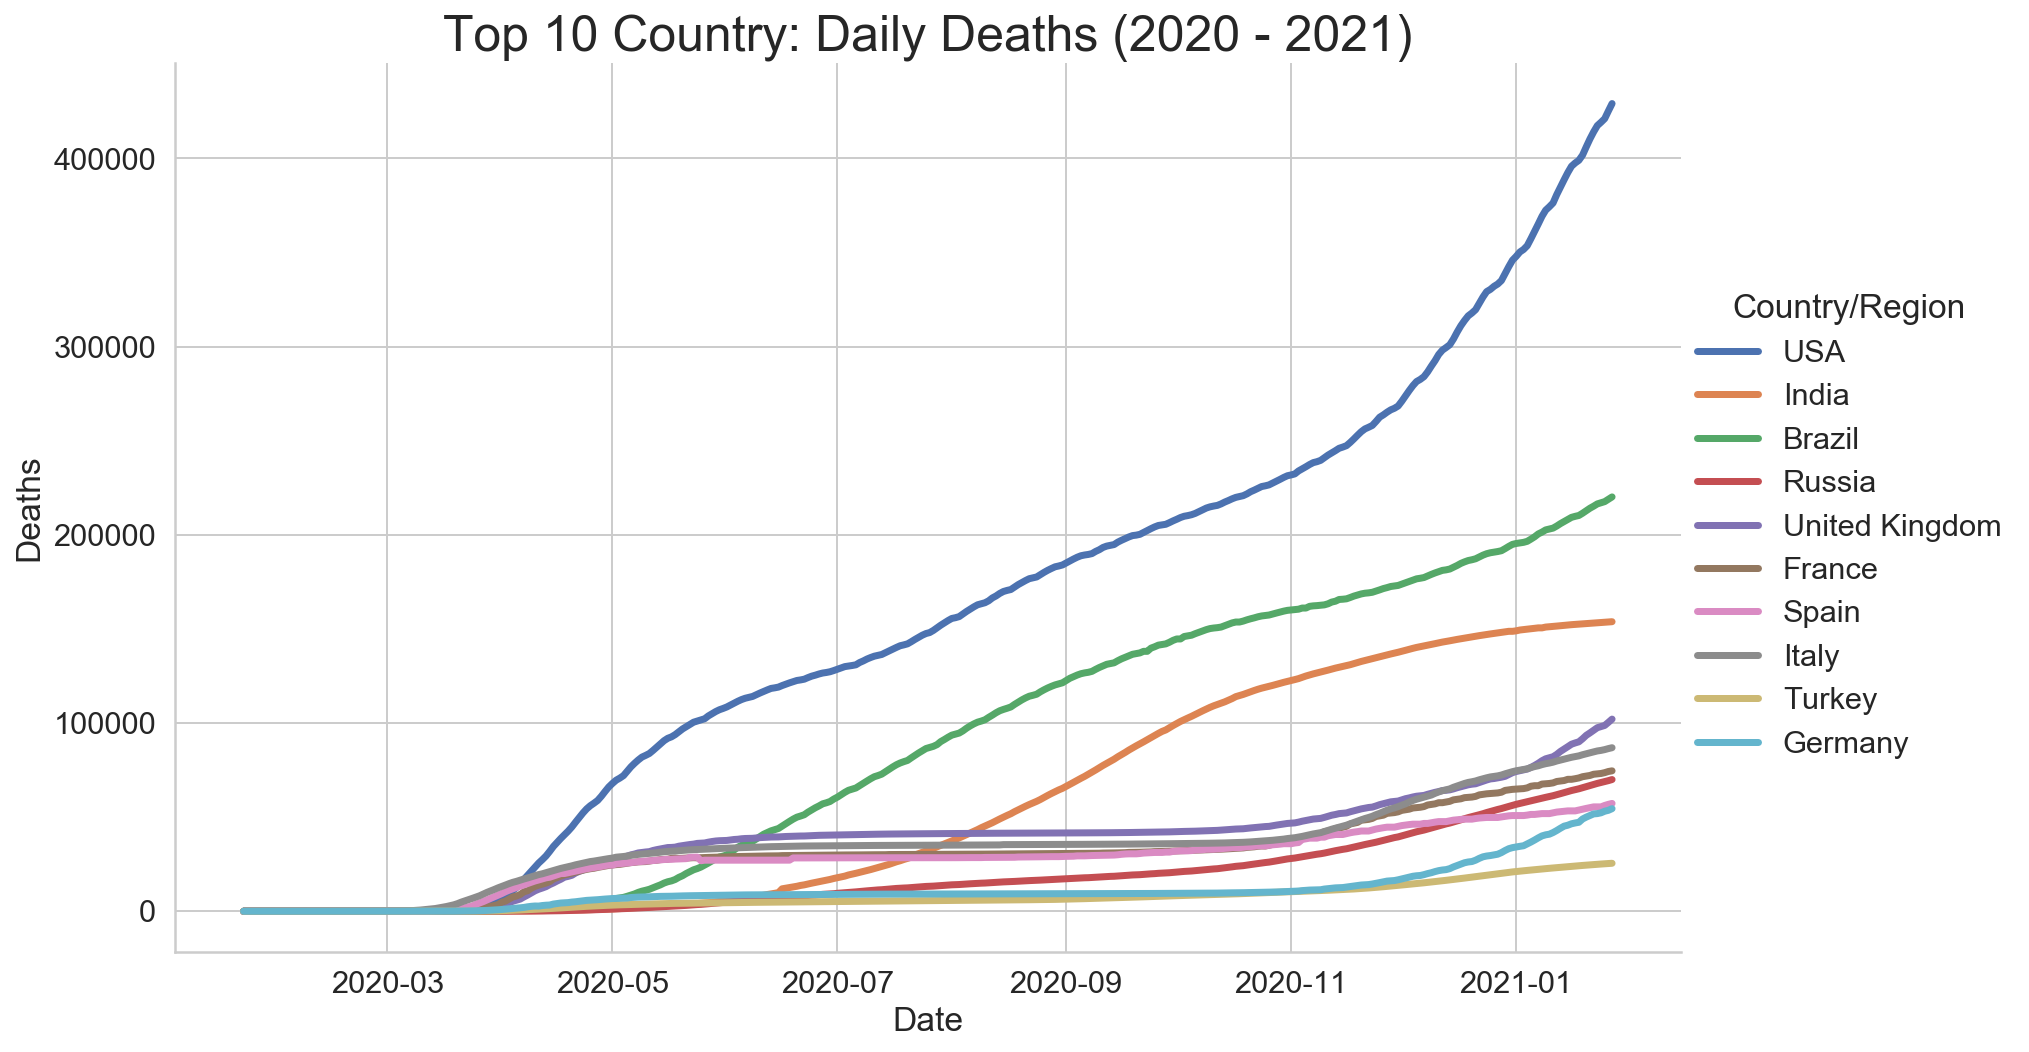

In [ ]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":3.5,
                                               "axes.titlesize":25})
# Plot the deaths comparison between countries
sns.relplot(
    data = top10_country_cases, x="Date", y="Deaths",
    hue="Country/Region",
    hue_order = top10_country,
    kind="line",
    height=7, aspect=1.7, facet_kws=dict(sharex=False))\
.set(title="Top 10 Country: Daily Deaths (2020 - 2021)")
plt.show();

In [ ]:



# Extract US data
countries_cases_all_time = countries_cases_all_time.sort_values(["Country/Region","Date"]).reset_index(drop=True)
us_df=countries_cases_all_time[countries_cases_all_time["Country/Region"]=="USA"]
# Calculate US new cases
us_df["New Cases"] = us_df["Confirmed Cases"] - us_df["Confirmed Cases"].shift(1)
us_df["New Deaths"] = us_df["Deaths"] - us_df["Deaths"].shift(1)
# Calculate 7-day rolling average new cases in US
us_df['7-Day Rolling Average New Cases'] = us_df['New Cases'].rolling(7).mean()
# Calculate 7-day rolling average confirmed cases in US
us_df['7-Day Rolling Average Confirmed Cases'] = us_df['Confirmed Cases'].rolling(7).mean()
# Calculate 7-day rolling average new cases in US
us_df['7-Day Rolling Average New Deaths'] = us_df['New Deaths'].rolling(7).mean()
# Calculate 7-day rolling average deaths in US
us_df['7-Day Rolling Average Deaths'] = us_df['Deaths'].rolling(7).mean()


# Calculate per 100k
us_df['New Cases per 100k'] = us_df['New Cases']/100000
us_df['New Deaths per 100k'] = us_df['New Deaths']/100000

# Engineer the rest of the the world data
us_df = us_df.reset_index() # Reset US index
def season(month):
    if month in ([2,3,4]):
        season = "Spring"
    elif month in ([5,6,7]):
        season = "Summer"
    elif month in ([8,9,10]):
        season = "Fall"
    else:
        season = "Winter"
    return season

us_df['season'] = us_df["Month"].apply(lambda x:season(x)) # Add season to US

## US Timeline Analysis

### How does the situation look like in the United States ?

  - 1. KDE (Kernal Density Estimate): Daily New Cases & Deaths Distribution.
  - 2. Bar Chart: Monthly Total New Cases and New Deaths in U.S.
  - 3. Boxplot: Monthly New Cases & Deaths Distribution
  - 4. Line & Area Chart: 7 Days Rolling Average of Confirmed Cases, Deaths, New Cases, New Deaths Over Time.
  - 5. Heatmap: New Cases & New Deaths for days of the month.
________________________________

In [ ]:
# Country_data
print("Up till {}".format(final_date))
print("United States has {} confirmed cases, {} deaths, and {}% fatality rate".\
      format(country_data[country_data['Country/Region']=='USA']['Confirmed Cases'].iloc[0],
            country_data[country_data['Country/Region']=='USA']['Deaths'].iloc[0],
            country_data[country_data['Country/Region']=='USA']['fatality_rate'].iloc[0]))

Up till 01/27/2021
United States has 25598061 confirmed cases, 429195 deaths, and 1.68% fatality rate


## 4. Line & Area Chart: 7-Day Rolling Average COVID New Cases & Deaths in US Over Time

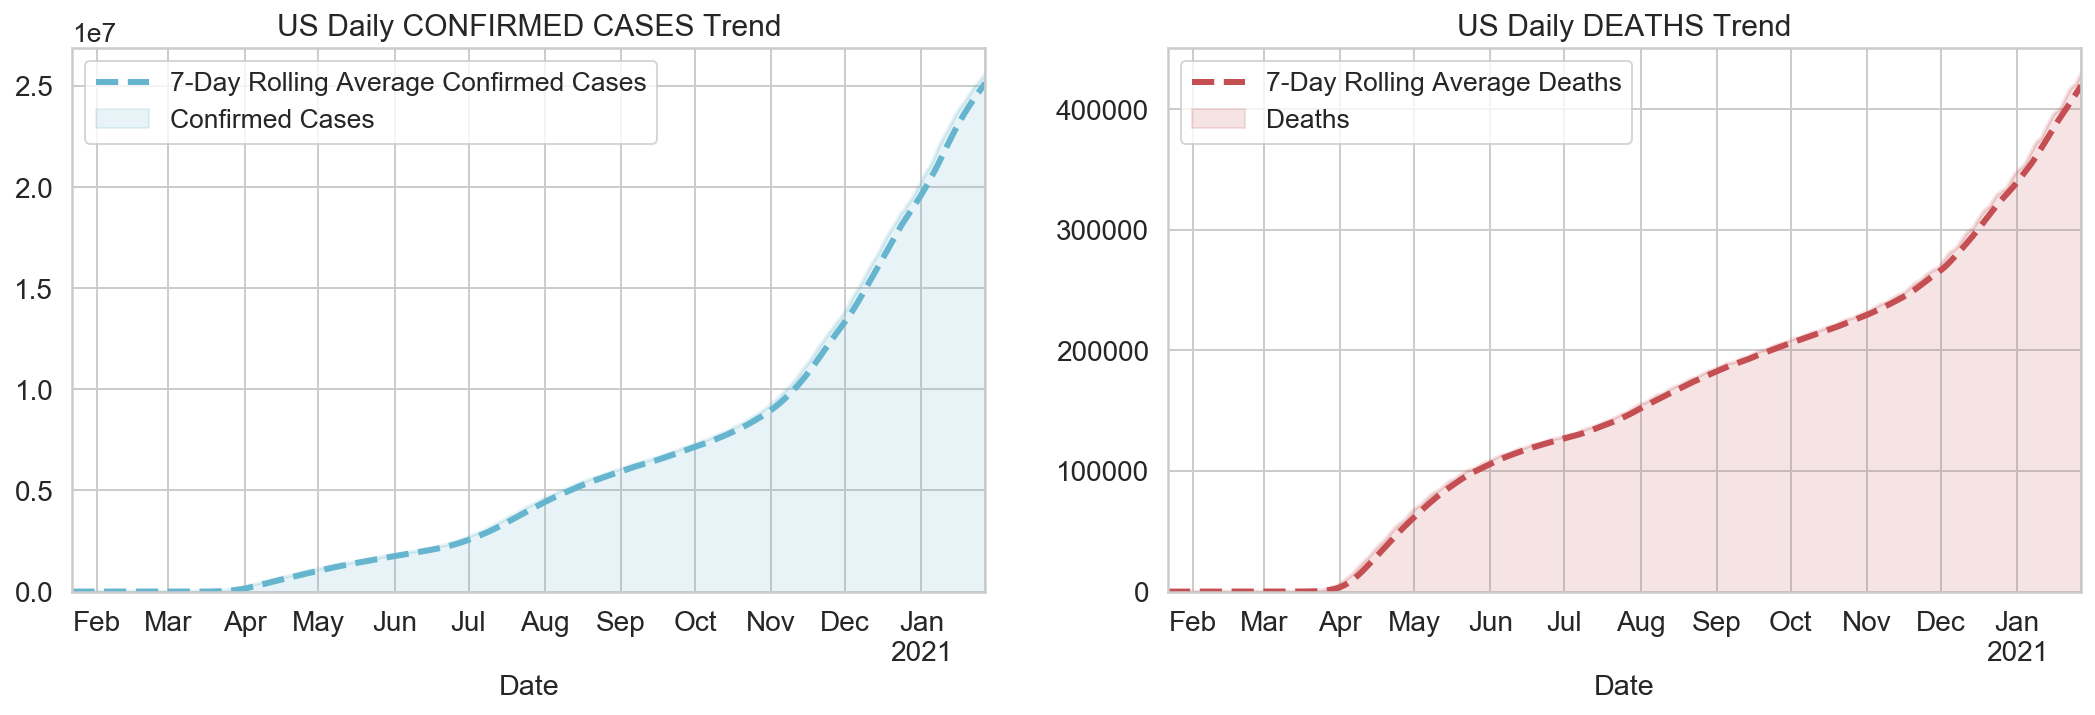

In [ ]:
# # LINE & AREA CHARTS - CONFIRMED CASES & DEATHS
# Set up seaborn chart configuration
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth":2,"axes.titlesize":15})
# Set up matplotlib figure
f, ax = plt.subplots(figsize=(18,5), ncols=2, sharex=False)

# Plot US Daily New Cases Trend
us_df.groupby("Date")['7-Day Rolling Average Confirmed Cases'].sum().plot(kind="line",
        title="US Daily CONFIRMED CASES Trend", color="c", legend="True", fontsize=14, ax=ax[0],linestyle="dashed", linewidth=3)
us_df.groupby("Date")['Confirmed Cases'].sum().plot(kind="area",
        title="US Daily CONFIRMED CASES Trend", color="c", legend="True", alpha=.15, fontsize=14, ax=ax[0])
# Plot US Daily New Deaths Trend
us_df.groupby("Date")['7-Day Rolling Average Deaths'].sum().plot(kind="line",
        title="US Daily DEATHS Trend", color="r", legend="True", fontsize=14, ax=ax[1], linestyle="dashed", linewidth=3)
us_df.groupby("Date")['Deaths'].sum().plot(kind="area",
        title="US Daily DEATHS Trend", color="r", legend="True", alpha=.15, fontsize=14, ax=ax[1])
plt.show();

## 5. Heatmap: New Cases & New Deaths Every Day of The Month.


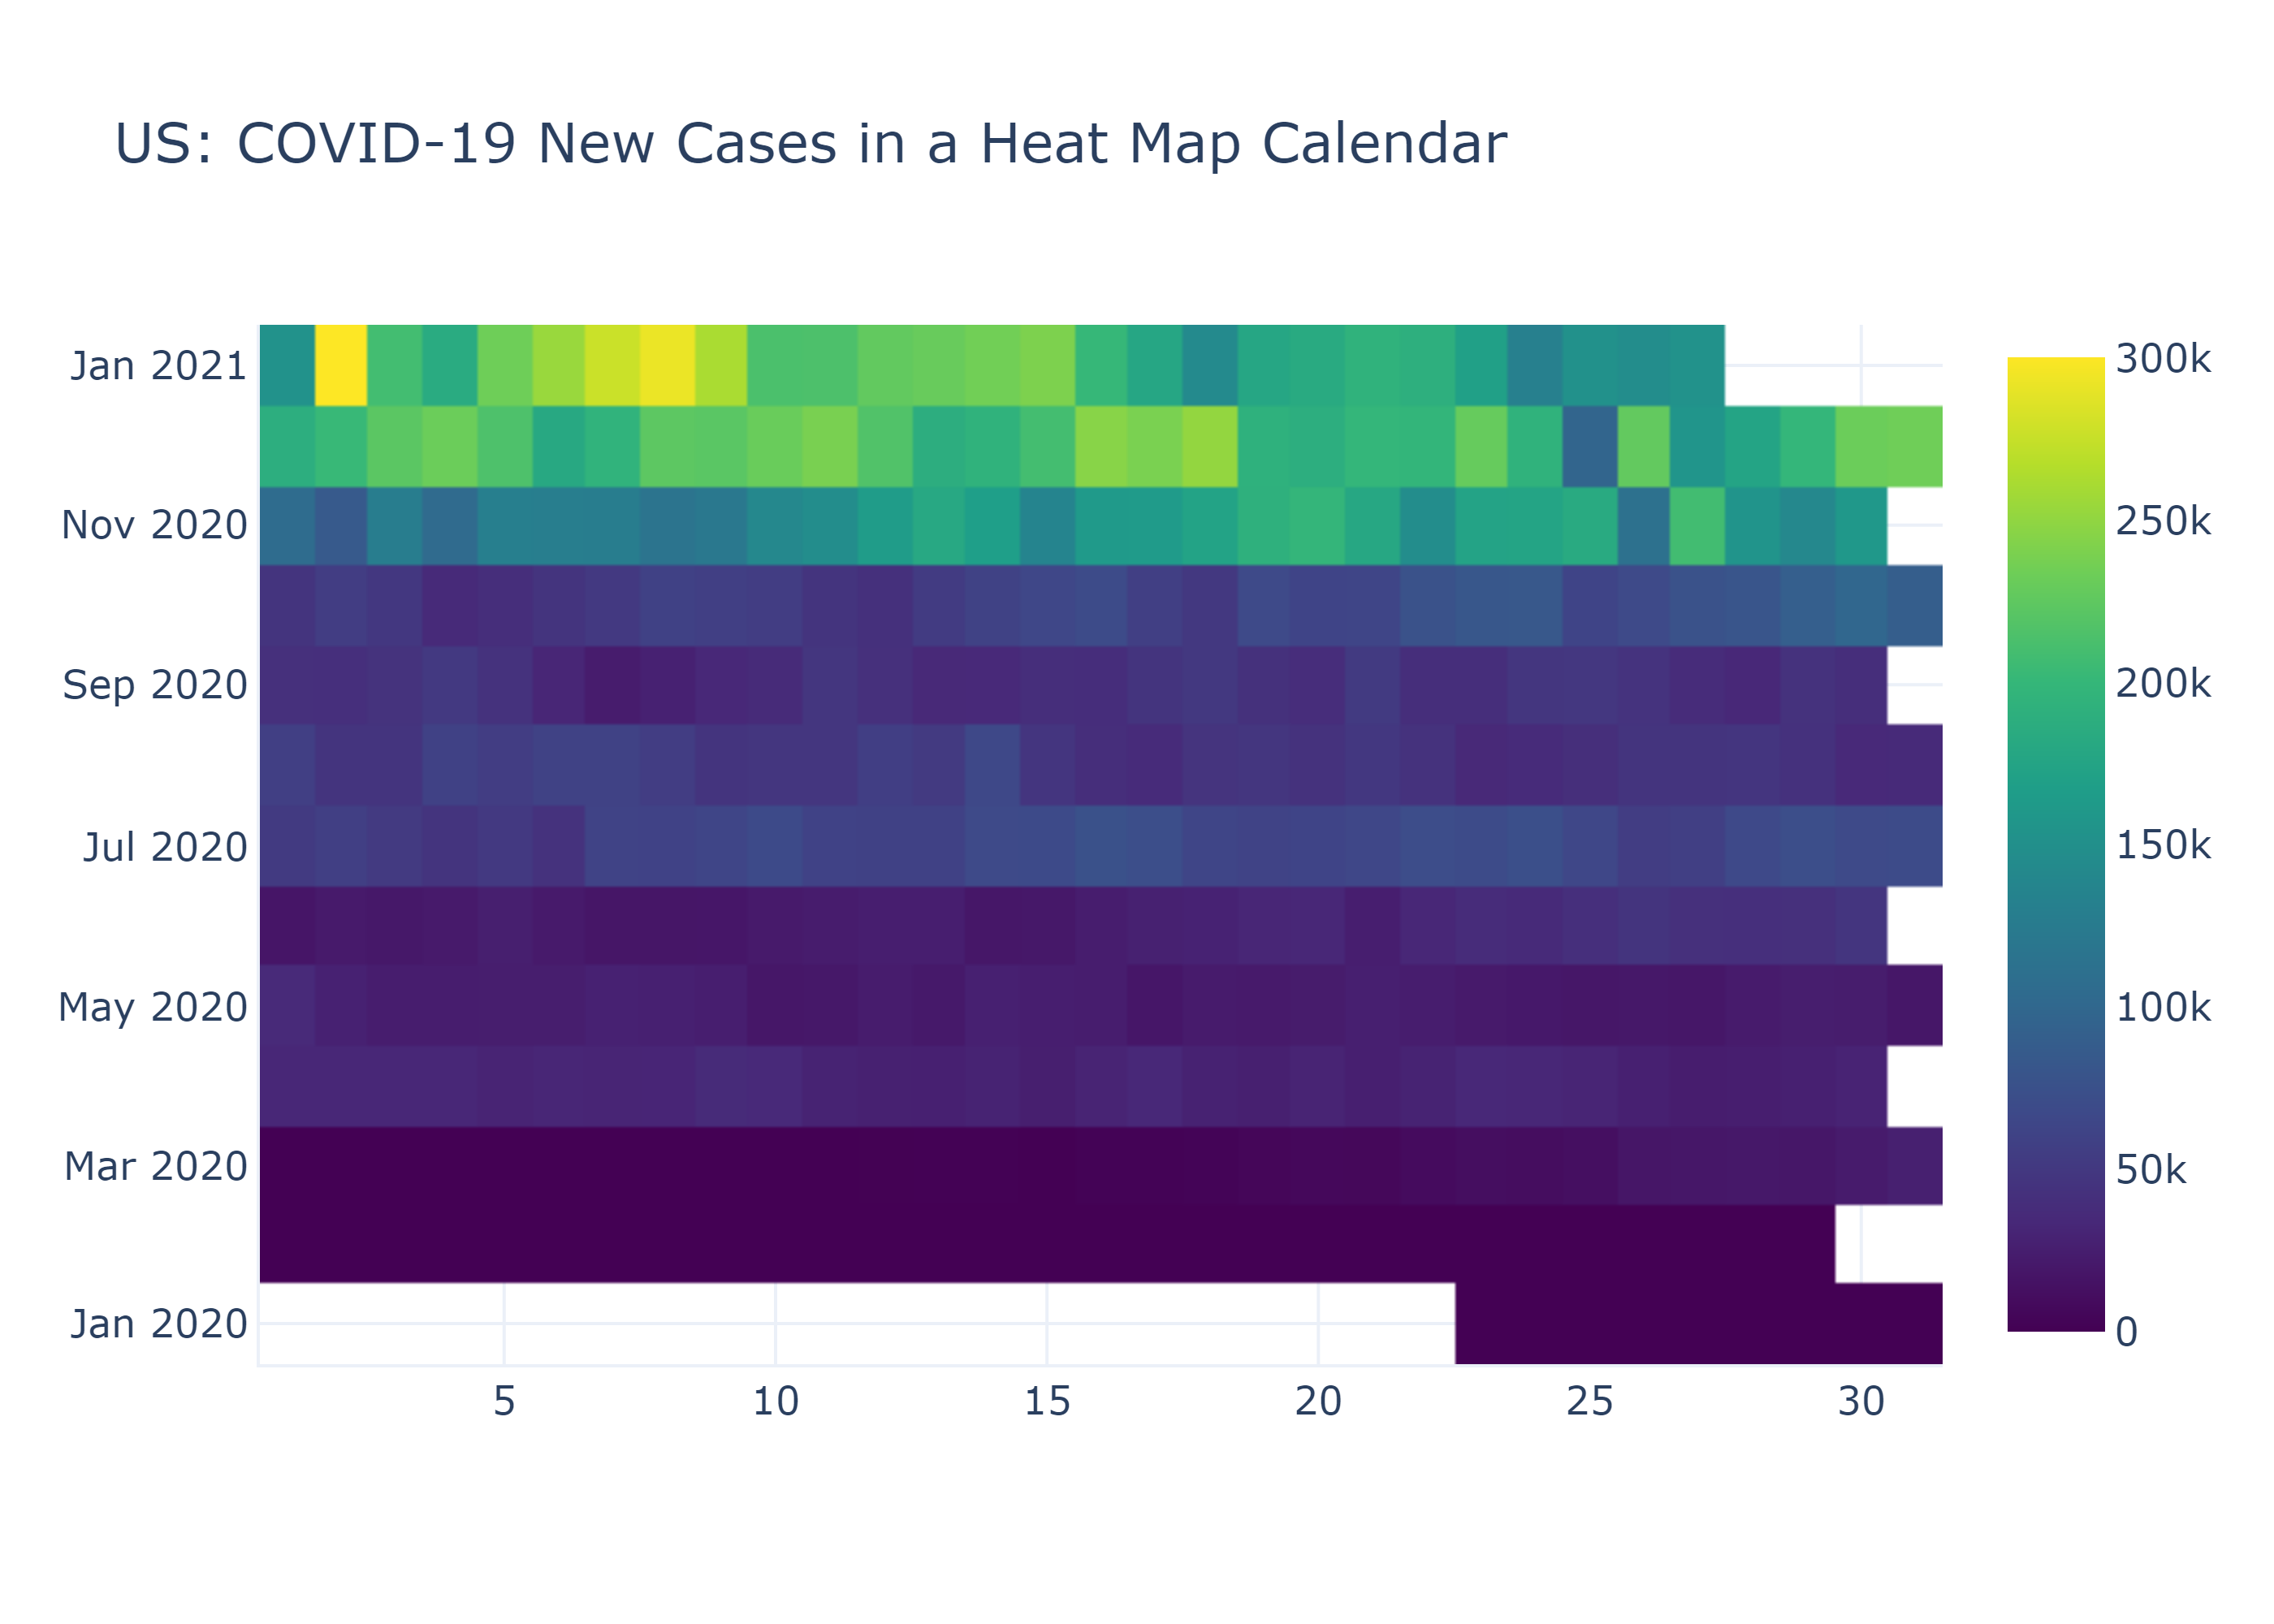

In [ ]:
us_df['Month-Year'] = us_df['Month-Year'].apply(str)
us_df['Day'] = us_df['Day'].apply(str)
# Heatmap - demonstrate the number of new cases
fig7 = go.Figure(data=go.Heatmap( z=us_df['New Cases'], x=us_df['Day'], y=us_df['Month-Year'],
        colorscale='Viridis'))
fig7.update_layout(title = 'US: COVID-19 New Cases in a Heat Map Calendar')
pio.write_image(fig7, "US New Cases Calendar Heatmap.png", format='png',scale=4)
#fig5.show()
Image(pio.to_image(fig7, format='png', scale=4))

December 2020 and January 2021 saw a significant increase in infections, from 200,000 to 300,000 new cases every day in the Untied States.

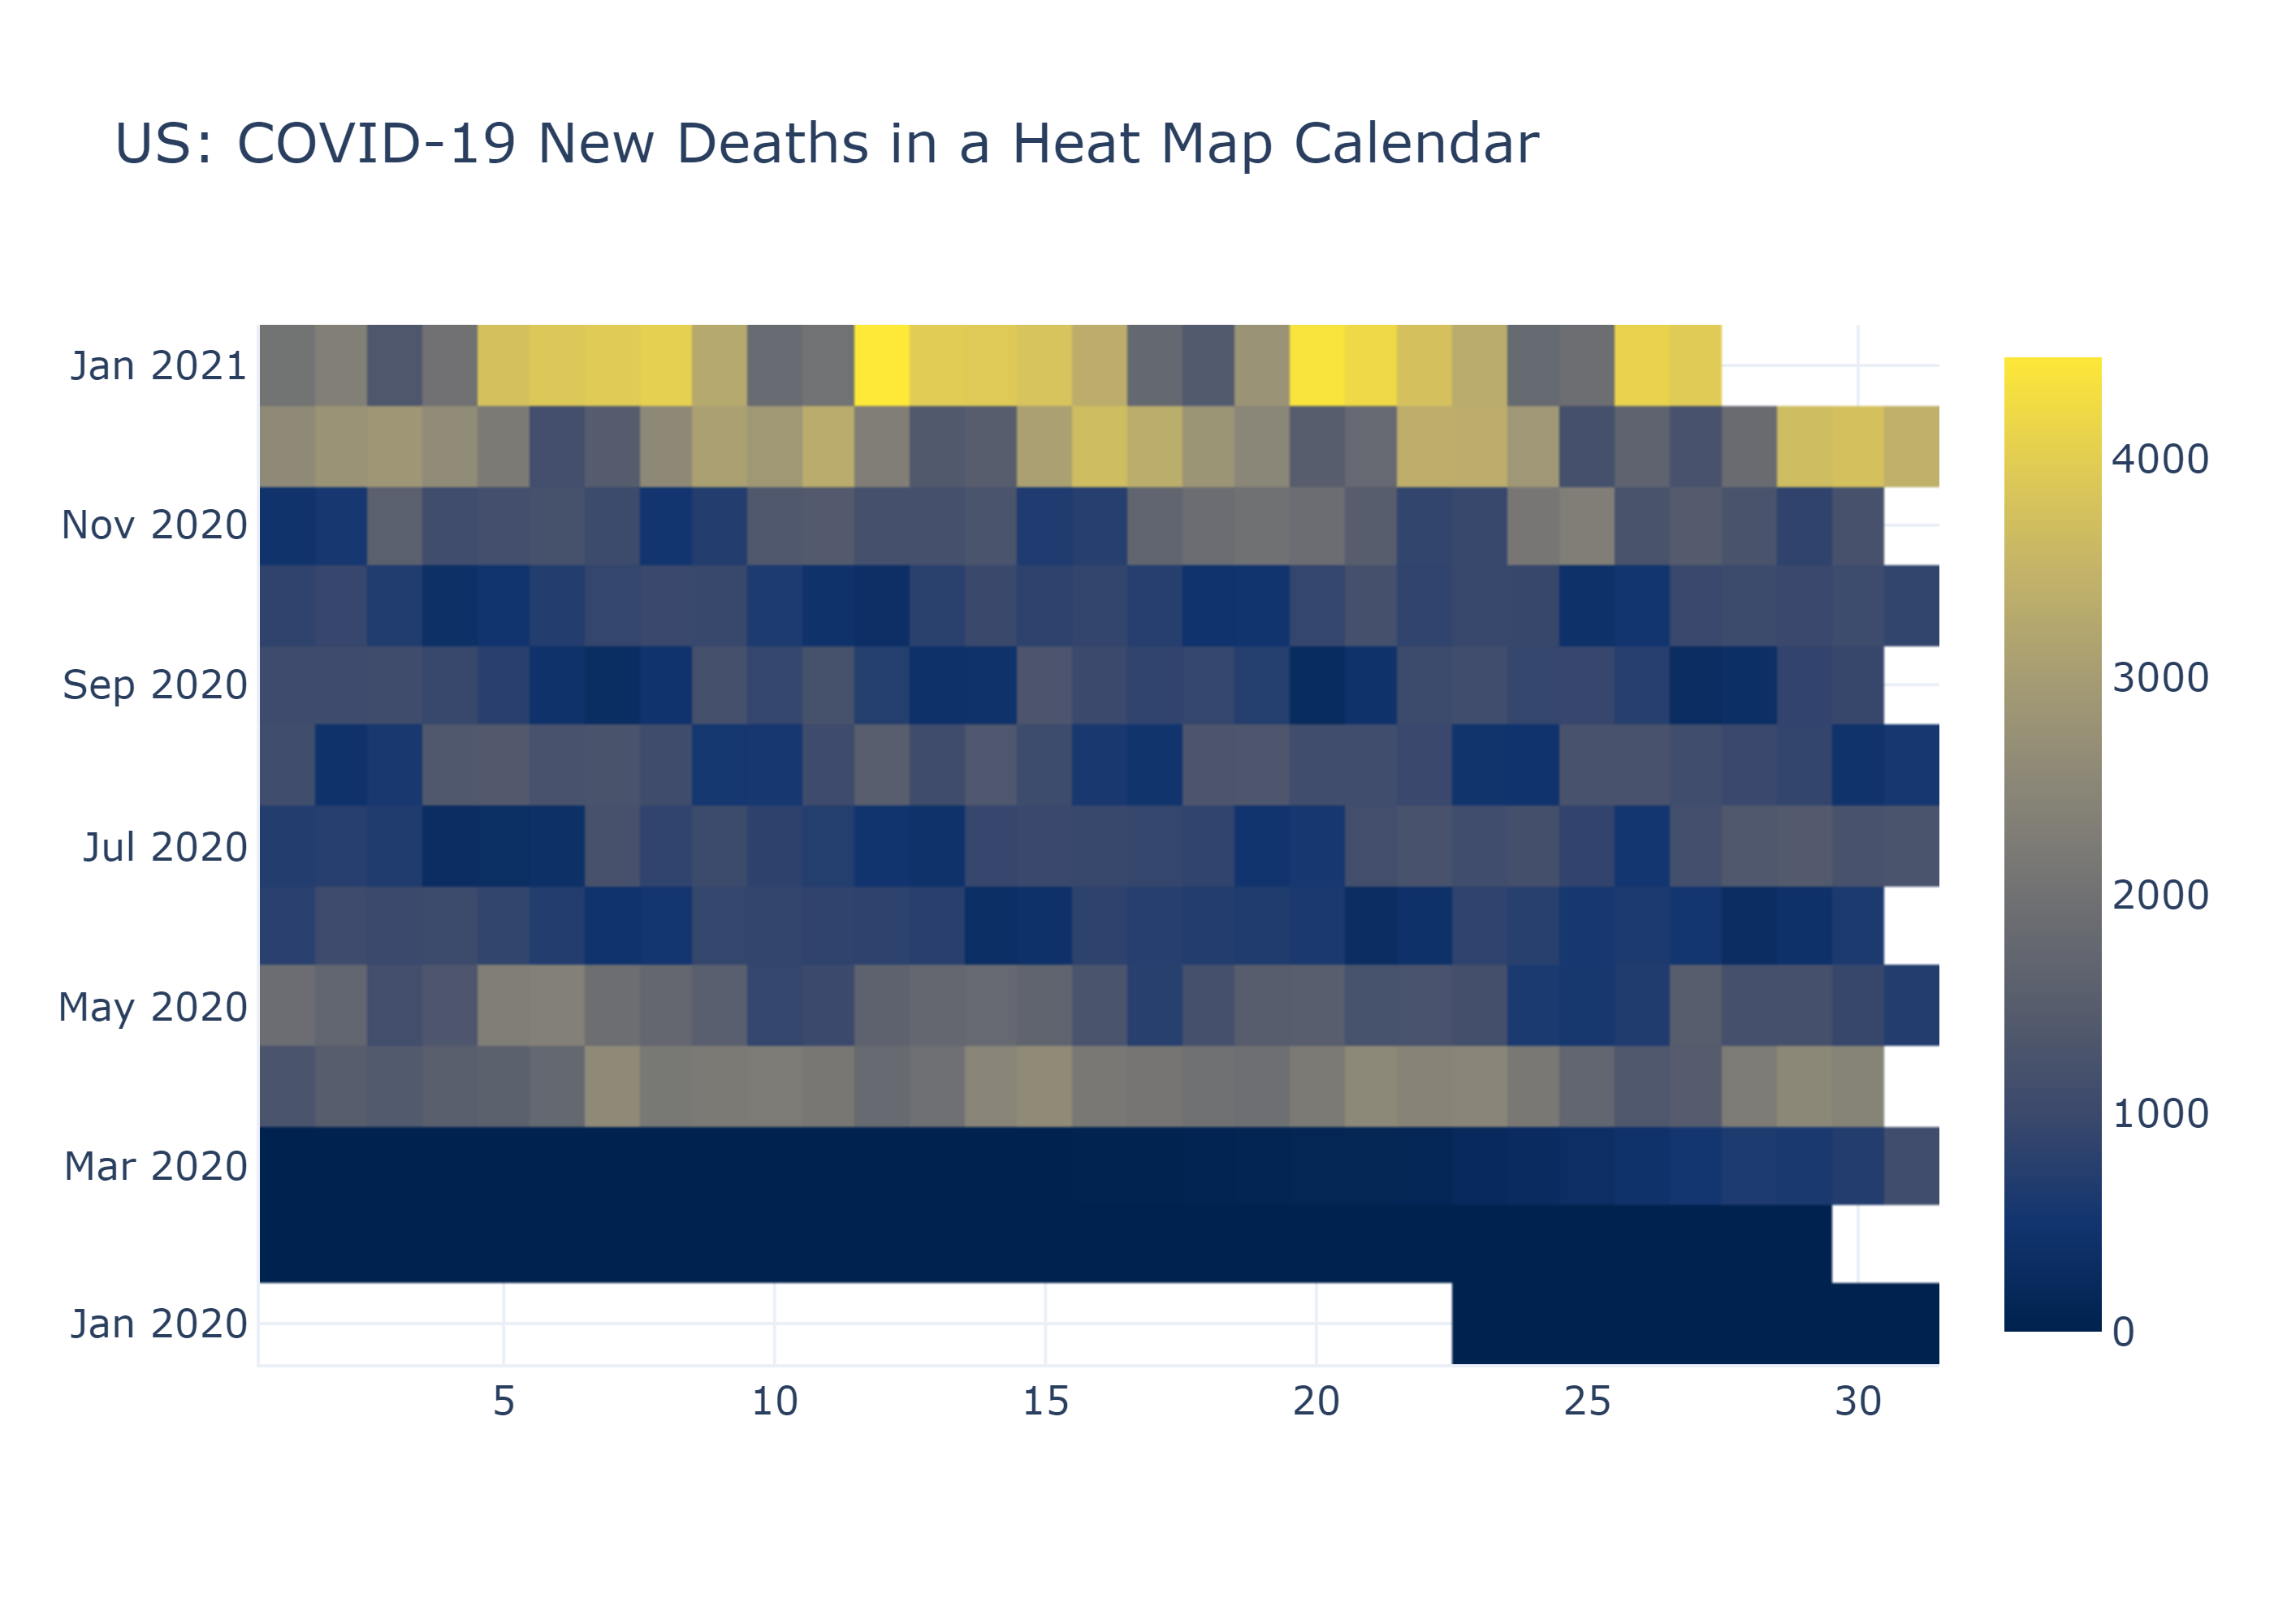

In [ ]:
# Heatmap - demonstrate the number of new deaths
us_df['Month-Year'] = us_df['Month-Year'].apply(str)
us_df['Day'] = us_df['Day'].apply(str)
fig8 = go.Figure(data=go.Heatmap( z=us_df['New Deaths'], x=us_df['Day'], y=us_df['Month-Year'],
        colorscale='Cividis'))
fig8.update_layout(title = 'US: COVID-19 New Deaths in a Heat Map Calendar')
pio.write_image(fig8, "US New Deaths Calendar Heatmap.png", format='png',scale=4)
#fig6.show()

Image(pio.to_image(fig8, format='png', scale=4))

The number of new deaths reached 4,000 every days in the U.S. in January 2021.

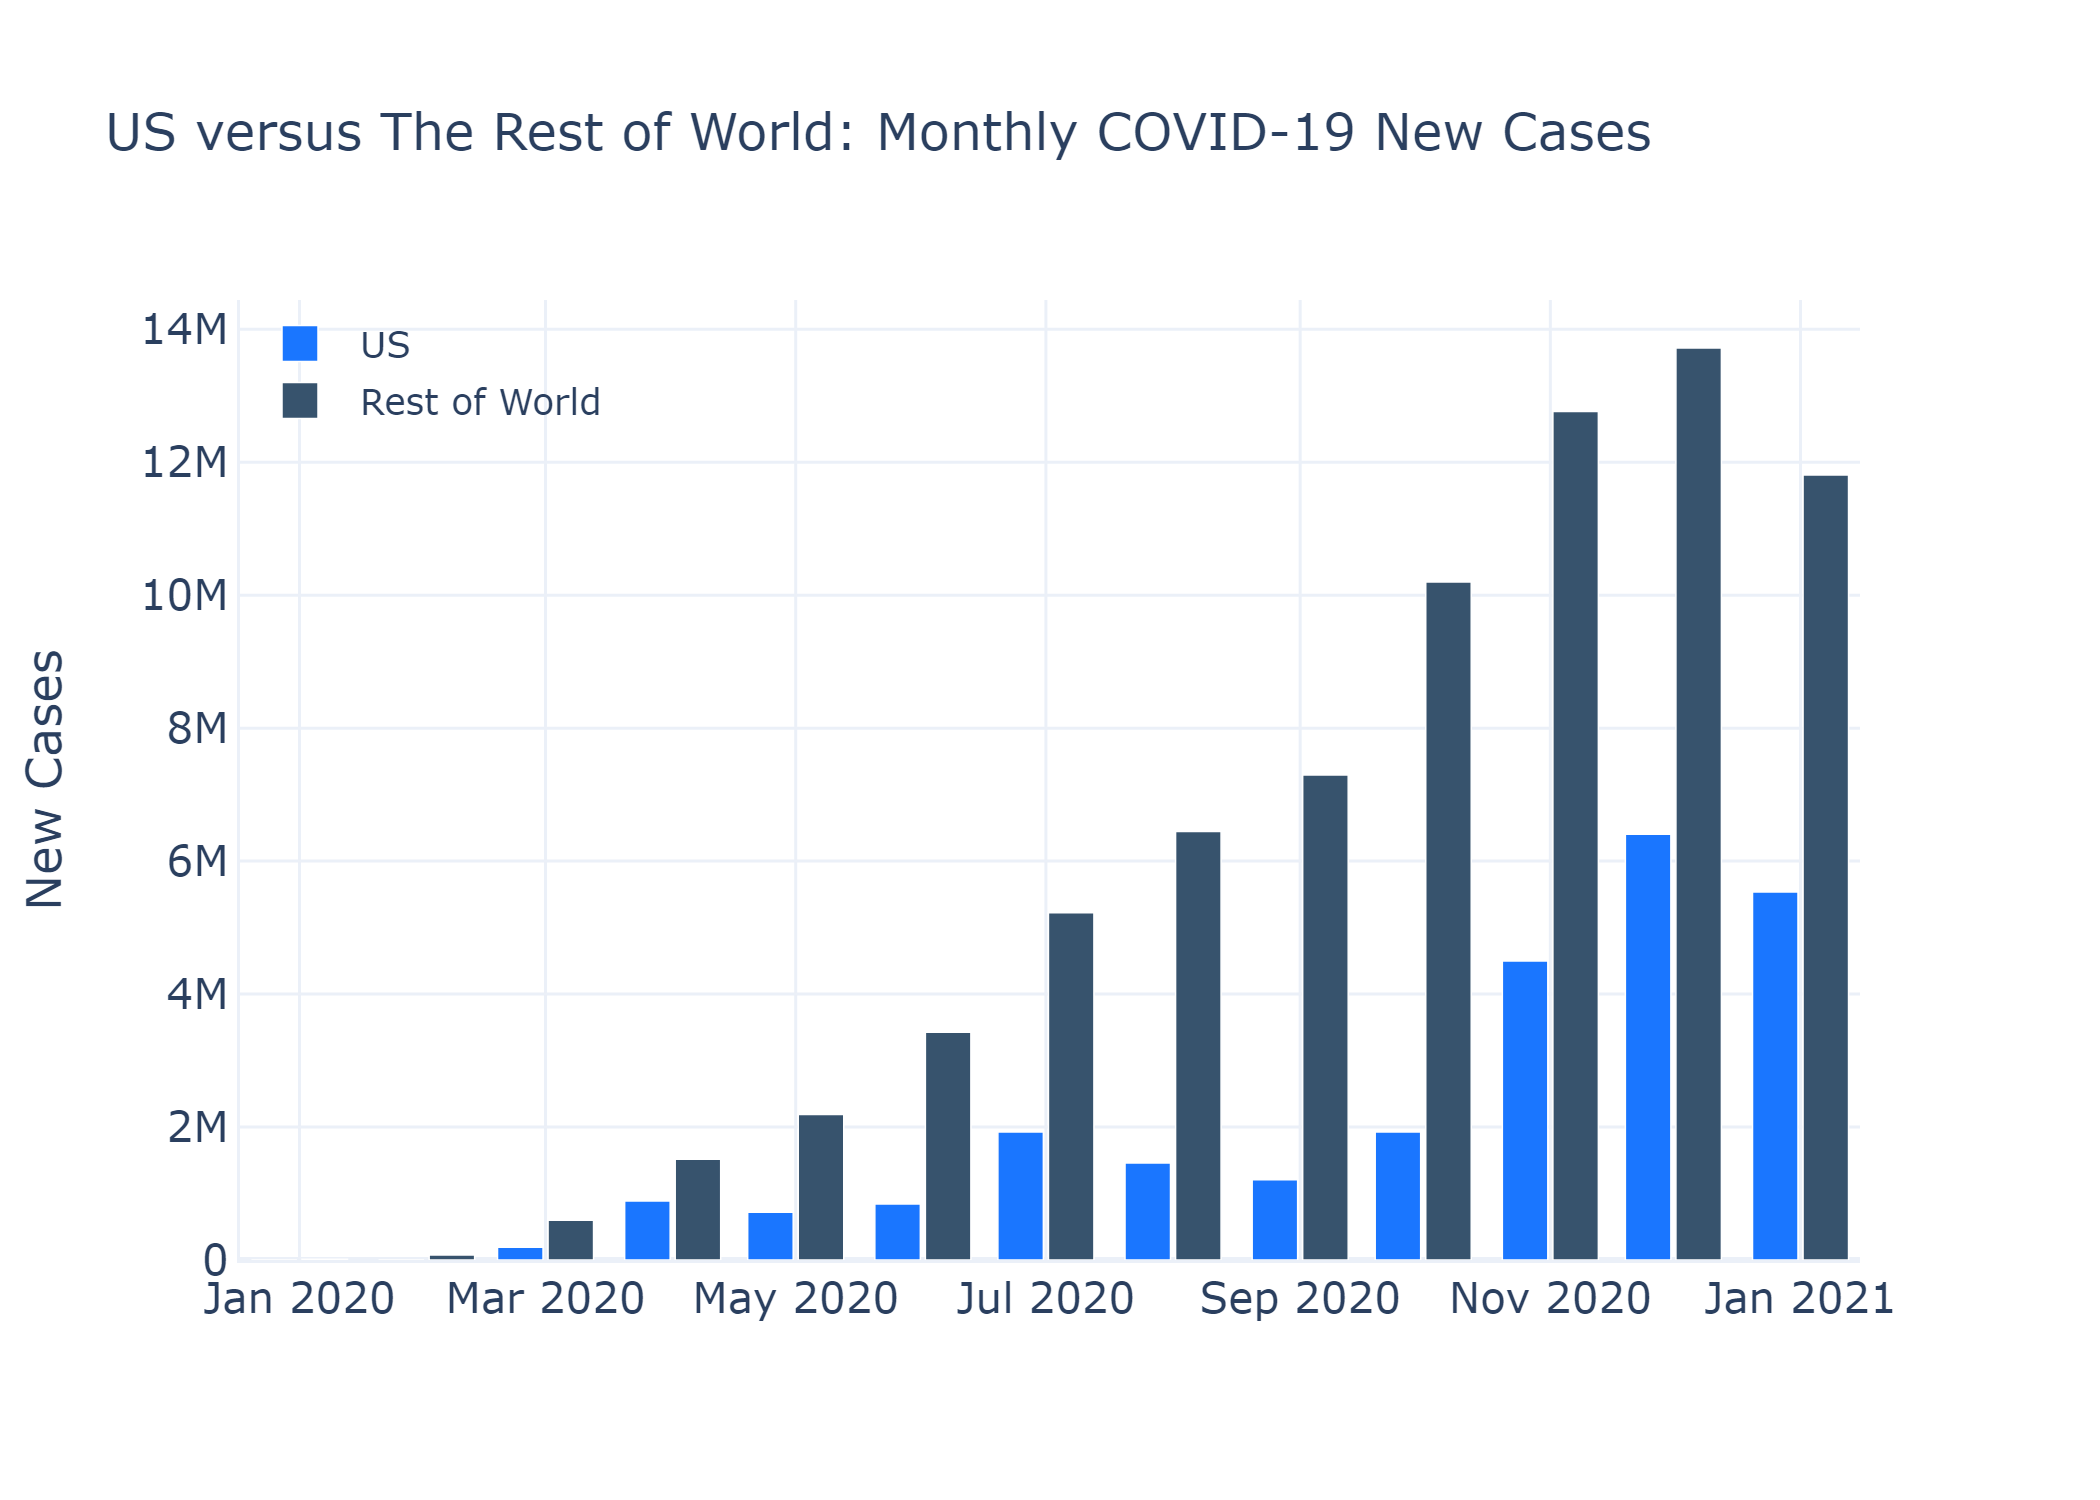

In [ ]:
fig9 = go.Figure()
fig9.add_trace(go.Bar(x=[str(i) for i in us_df.groupby('Month-Year')['New Cases'].sum().index],    # Add month
                      y=us_df.groupby('Month-Year')['New Cases'].sum().values,
                      name="US",
                      marker_color='rgb(26, 118, 255)'))  # Add total monthly new cases
fig9.add_trace(go.Bar(x=[str(i) for i in world_cases_all_time.groupby('Month-Year')['Rest of World New Cases'].sum().index],
                      y=world_cases_all_time.groupby('Month-Year')['Rest of World New Cases'].sum().values,
                      name="Rest of World",
                      marker_color='rgb(55, 83, 109)'))
fig9.update_layout(title='US versus The Rest of World: Monthly COVID-19 New Cases',
                  xaxis_tickfont_size=14,
                  yaxis=dict(title='New Cases',
                            titlefont_size=16,
                            tickfont_size=14),
                  legend=dict(x=0, y=1.0,
                             bgcolor='rgba(255, 255, 255, 0)',
                             bordercolor='rgba(255, 255, 255, 0)'),
                  barmode='group',
                  bargap =0.15,
                 bargroupgap=0.1)
#fig9.show()     # interactive chart
pio.write_image(fig9, "US and The Rest New Cases.png", format='png',scale=4)
Image(pio.to_image(fig9, format='png', scale=3))
#pio.write_image(fig9, "US and The Rest New Cases.png", format='png',scale=4)